<a href="https://colab.research.google.com/github/santiagonajera/Ejemplos-royectosDataScience/blob/main/AnaliisSentimientoElecciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Función para clasificar el sentimiento basado en palabras clave (rule-based)
def clasificar_sentimiento(texto):
    texto = texto.lower()
    # Palabras clave positivas
    positivas = ['apoyo', 'excelente', 'ganar', 'mejor', 'cambio que perú necesita']
    # Palabras clave negativas
    negativas = ['no confío', 'escándalo', 'no merece', 'corrupción', 'falsas', 'desgracia', 'culpa']
    # Contar ocurrencias
    pos_count = sum(1 for palabra in positivas if palabra in texto)
    neg_count = sum(1 for palabra in negativas if palabra in texto)

    if pos_count > neg_count:
        return 'Positivo'
    elif neg_count > pos_count:
        return 'Negativo'
    else:
        return 'Neutral'

# Leer el archivo CSV
df = pd.read_csv('https://github.com/santiagonajera/Ejemplos-royectosDataScience/raw/refs/heads/main/eleeciopnesPeru.txt')

# Aplicar el análisis de sentimiento a la columna 'text'
df['sentimiento'] = df['text'].apply(clasificar_sentimiento)

# Mostrar resumen
print(df['sentimiento'].value_counts())
print("\nMuestra de los primeros 10 tweets con sentimientos:")
print(df[['id', 'text', 'sentimiento']].head(10))

ParserError: Error tokenizing data. C error: Expected 1 fields in line 6, saw 2


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Función para clasificar el sentimiento basado en palabras clave (rule-based)
def clasificar_sentimiento(texto):
    texto = str(texto).lower()
    # Palabras clave positivas
    positivas = ['apoyo', 'excelente', 'ganar', 'mejor', 'cambio que perú necesita']
    # Palabras clave negativas
    negativas = ['no confío', 'escándalo', 'no merece', 'corrupción', 'falsas', 'desgracia', 'culpa']
    # Contar ocurrencias
    pos_count = sum(1 for palabra in positivas if palabra in texto)
    neg_count = sum(1 for palabra in negativas if palabra in texto)

    if pos_count > neg_count:
        return 'Positivo'
    elif neg_count > pos_count:
        return 'Negativo'
    else:
        return 'Neutral'

# ========== CORRECCIÓN DEL ERROR ==========
# El error ocurre porque el archivo .txt no usa comas como separador
# SOLUCIÓN: Usar sep='\t' (tabulación) y manejar líneas problemáticas

try:
    # OPCIÓN 1: Usar tabulación como delimitador
    df = pd.read_csv(
        'https://github.com/santiagonajera/Ejemplos-royectosDataScience/raw/refs/heads/main/eleeciopnesPeru.txt',
        sep='\t',                    # 🔧 CORRECCIÓN: Usar tabulación en lugar de coma
        encoding='utf-8',
        on_bad_lines='skip'          # 🔧 CORRECCIÓN: Saltar líneas con problemas
    )
    print("✓ Archivo cargado exitosamente con delimitador de tabulación")

except Exception as e:
    print(f"Error con tabulación: {e}")

    # OPCIÓN 2: Detectar automáticamente el delimitador
    try:
        df = pd.read_csv(
            'https://github.com/santiagonajera/Ejemplos-royectosDataScience/raw/refs/heads/main/eleeciopnesPeru.txt',
            sep=None,                # 🔧 Detectar automáticamente
            engine='python',         # 🔧 Usar motor Python para mejor detección
            encoding='utf-8',
            on_bad_lines='skip'
        )
        print("✓ Archivo cargado exitosamente con detección automática de delimitador")

    except Exception as e2:
        print(f"Error con detección automática: {e2}")
        print("Por favor, verifica el formato del archivo manualmente")
        raise

# Aplicar el análisis de sentimiento a la columna 'text'
df['sentimiento'] = df['text'].apply(clasificar_sentimiento)

# Mostrar resumen
print("\n" + "=" * 60)
print("ANÁLISIS DE SENTIMIENTO - ELECCIONES PERÚ")
print("=" * 60)
print("\nDistribución de sentimientos:")
print(df['sentimiento'].value_counts())
print(f"\nTotal de tweets analizados: {len(df)}")

print("\n" + "=" * 60)
print("Muestra de los primeros 10 tweets con sentimientos:")
print("=" * 60)
print(df[['id', 'text', 'sentimiento']].head(10).to_string())

# ===== CREAR GRÁFICAS =====
print("\n" + "=" * 60)
print("Generando gráficas...")
print("=" * 60)

# Configurar el estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Crear figura con múltiples subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Análisis de Sentimiento - Elecciones Perú', fontsize=16, fontweight='bold')

# Definir colores para cada sentimiento
colors = {'Positivo': '#2ecc71', 'Negativo': '#e74c3c', 'Neutral': '#95a5a6'}
sentiment_counts = df['sentimiento'].value_counts()

# 1. Gráfico de barras verticales
bar_colors = [colors.get(x, '#3498db') for x in sentiment_counts.index]
axes[0, 0].bar(sentiment_counts.index, sentiment_counts.values,
               color=bar_colors, alpha=0.8, edgecolor='black')
axes[0, 0].set_title('Distribución de Sentimientos (Barras)', fontweight='bold')
axes[0, 0].set_xlabel('Sentimiento')
axes[0, 0].set_ylabel('Cantidad de Tweets')
axes[0, 0].grid(axis='y', alpha=0.3)

# Agregar valores encima de las barras
for i, (idx, val) in enumerate(sentiment_counts.items()):
    axes[0, 0].text(i, val + max(sentiment_counts.values)*0.02, str(val),
                    ha='center', va='bottom', fontweight='bold')

# 2. Gráfico de pastel
explode_vals = [0.05 if x == sentiment_counts.idxmax() else 0 for x in sentiment_counts.index]
axes[0, 1].pie(sentiment_counts.values,
               labels=sentiment_counts.index,
               autopct='%1.1f%%',
               startangle=90,
               colors=[colors.get(x, '#3498db') for x in sentiment_counts.index],
               explode=explode_vals,
               shadow=True)
axes[0, 1].set_title('Proporción de Sentimientos (Pastel)', fontweight='bold')

# 3. Gráfico de barras horizontales con porcentajes
total = len(df)
percentages = (sentiment_counts / total * 100).sort_values()
axes[1, 0].barh(percentages.index, percentages.values,
                color=[colors.get(x, '#3498db') for x in percentages.index],
                alpha=0.8, edgecolor='black')
axes[1, 0].set_title('Porcentaje de Sentimientos (Horizontal)', fontweight='bold')
axes[1, 0].set_xlabel('Porcentaje (%)')
axes[1, 0].grid(axis='x', alpha=0.3)

# Agregar valores al lado de las barras
for i, (idx, val) in enumerate(percentages.items()):
    axes[1, 0].text(val + 1, i, f'{val:.1f}%', va='center', fontweight='bold')

# 4. Resumen estadístico en texto
axes[1, 1].axis('off')
summary_text = f"""
RESUMEN ESTADÍSTICO

Total de tweets: {len(df)}

Positivos: {sentiment_counts.get('Positivo', 0)} ({sentiment_counts.get('Positivo', 0)/len(df)*100:.1f}%)
Negativos: {sentiment_counts.get('Negativo', 0)} ({sentiment_counts.get('Negativo', 0)/len(df)*100:.1f}%)
Neutrales: {sentiment_counts.get('Neutral', 0)} ({sentiment_counts.get('Neutral', 0)/len(df)*100:.1f}%)

Sentimiento predominante: {sentiment_counts.idxmax()}
"""
axes[1, 1].text(0.1, 0.5, summary_text, fontsize=12, verticalalignment='center',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('analisis_sentimiento_completo.png', dpi=300, bbox_inches='tight')
print("✓ Gráfica completa guardada como 'analisis_sentimiento_completo.png'")

# Crear una segunda figura más detallada
fig2, ax = plt.subplots(figsize=(12, 6))
sentiment_counts_sorted = sentiment_counts.sort_values(ascending=False)
bars = ax.bar(range(len(sentiment_counts_sorted)), sentiment_counts_sorted.values,
              color=[colors.get(x, '#3498db') for x in sentiment_counts_sorted.index],
              alpha=0.8, edgecolor='black', linewidth=2)

ax.set_xticks(range(len(sentiment_counts_sorted)))
ax.set_xticklabels(sentiment_counts_sorted.index, fontsize=12, fontweight='bold')
ax.set_ylabel('Cantidad de Tweets', fontsize=12, fontweight='bold')
ax.set_title('Análisis de Sentimiento - Elecciones Perú\n(Tweets por Categoría)',
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Agregar valores y porcentajes
for i, (bar, val) in enumerate(zip(bars, sentiment_counts_sorted.values)):
    height = bar.get_height()
    percentage = val / total * 100
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{val}\n({percentage:.1f}%)',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig('analisis_sentimiento_detallado.png', dpi=300, bbox_inches='tight')
print("✓ Gráfica detallada guardada como 'analisis_sentimiento_detallado.png'")

print("\n" + "=" * 60)
print("✓ ANÁLISIS COMPLETADO EXITOSAMENTE!")
print("=" * 60)
print("\nSe generaron las siguientes gráficas:")
print("  1. analisis_sentimiento_completo.png (4 subgráficas)")
print("  2. analisis_sentimiento_detallado.png (gráfica principal)")

✓ Archivo cargado exitosamente con delimitador de tabulación


KeyError: 'text'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Función para clasificar el sentimiento basado en palabras clave (rule-based)
def clasificar_sentimiento(texto):
    texto = str(texto).lower()

    # Palabras clave positivas
    positivas = ['apoyo', 'excelente', 'ganar', 'mejor', 'cambio', 'justicia',
                 'verdadero cambio', 'nueva era', 'por fin', 'ahora a trabajar']

    # Palabras clave negativas
    negativas = ['no confío', 'escándalo', 'no merece', 'corrupción', 'falsas',
                 'desgracia', 'culpa', 'amenaza', 'aterrorizados', 'inseguridad',
                 'extorsión', 'sicariato', 'impunidad', 'cansados', 'atentado']

    # Contar ocurrencias
    pos_count = sum(1 for palabra in positivas if palabra in texto)
    neg_count = sum(1 for palabra in negativas if palabra in texto)

    if pos_count > neg_count:
        return 'Positivo'
    elif neg_count > pos_count:
        return 'Negativo'
    else:
        return 'Neutral'

# ========== CARGAR ARCHIVO CON MANEJO DE BOM ==========
print("Cargando archivo...")

# 🔧 CORRECCIÓN: Usar encoding='utf-8-sig' para manejar el BOM
df = pd.read_csv(
    'https://github.com/santiagonajera/Ejemplos-royectosDataScience/blob/main/eleeciopnesPeru.txt',
    encoding='utf-8-sig',  # 🔑 Esto elimina el BOM automáticamente
    sep=','                 # El archivo usa comas
)

print(f"✓ Archivo cargado exitosamente")
print(f"\nColumnas encontradas: {list(df.columns)}")
print(f"Total de tweets: {len(df)}")

# Aplicar el análisis de sentimiento a la columna 'text'
df['sentimiento'] = df['text'].apply(clasificar_sentimiento)

# Mostrar resumen
print("\n" + "=" * 70)
print("ANÁLISIS DE SENTIMIENTO - TWEETS PERÚ OCTUBRE 2025")
print("=" * 70)
print("\n📊 Distribución de sentimientos:")
print(df['sentimiento'].value_counts())
print(f"\n📈 Porcentaje por sentimiento:")
print(df['sentimiento'].value_counts(normalize=True) * 100)

print("\n" + "=" * 70)
print("📝 Muestra de los primeros 10 tweets con sentimientos:")
print("=" * 70)
print(df[['id', 'text', 'sentimiento']].head(10).to_string())

# ===== ANÁLISIS ADICIONAL =====
print("\n" + "=" * 70)
print("📊 ANÁLISIS ADICIONAL:")
print("=" * 70)

# Tweets por fecha
print("\n🗓️ Tweets por fecha:")
print(df['date'].value_counts().sort_index())

# Hashtags más mencionados
print("\n🏷️ Top 10 hashtags más mencionados:")
all_hashtags = []
for hashtags in df['hashtags'].dropna():
    # Separar hashtags y limpiar
    tags = [tag.strip().strip('#') for tag in str(hashtags).split(',')]
    all_hashtags.extend(tags)

hashtag_counts = pd.Series(all_hashtags).value_counts().head(10)
print(hashtag_counts)

# ===== CREAR GRÁFICAS =====
print("\n" + "=" * 70)
print("🎨 Generando gráficas...")
print("=" * 70)

# Configurar el estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 10

# Crear figura con múltiples subplots
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Definir colores para cada sentimiento
colors = {'Positivo': '#2ecc71', 'Negativo': '#e74c3c', 'Neutral': '#95a5a6'}
sentiment_counts = df['sentimiento'].value_counts()

# 1. Gráfico de barras verticales
ax1 = fig.add_subplot(gs[0, 0])
bar_colors = [colors.get(x, '#3498db') for x in sentiment_counts.index]
bars1 = ax1.bar(sentiment_counts.index, sentiment_counts.values,
                color=bar_colors, alpha=0.8, edgecolor='black', linewidth=2)
ax1.set_title('Distribución de Sentimientos', fontweight='bold', fontsize=14)
ax1.set_xlabel('Sentimiento', fontweight='bold')
ax1.set_ylabel('Cantidad de Tweets', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Agregar valores encima de las barras
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

# 2. Gráfico de pastel
ax2 = fig.add_subplot(gs[0, 1])
explode_vals = [0.05 if x == sentiment_counts.idxmax() else 0 for x in sentiment_counts.index]
wedges, texts, autotexts = ax2.pie(sentiment_counts.values,
                                     labels=sentiment_counts.index,
                                     autopct='%1.1f%%',
                                     startangle=90,
                                     colors=[colors.get(x, '#3498db') for x in sentiment_counts.index],
                                     explode=explode_vals,
                                     shadow=True)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)
ax2.set_title('Proporción de Sentimientos', fontweight='bold', fontsize=14)

# 3. Gráfico de barras horizontales con porcentajes
ax3 = fig.add_subplot(gs[1, 0])
total = len(df)
percentages = (sentiment_counts / total * 100).sort_values()
bars3 = ax3.barh(percentages.index, percentages.values,
                 color=[colors.get(x, '#3498db') for x in percentages.index],
                 alpha=0.8, edgecolor='black', linewidth=2)
ax3.set_title('Porcentaje de Sentimientos', fontweight='bold', fontsize=14)
ax3.set_xlabel('Porcentaje (%)', fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

# Agregar valores
for i, (idx, val) in enumerate(percentages.items()):
    ax3.text(val + 1.5, i, f'{val:.1f}%', va='center', fontweight='bold', fontsize=10)

# 4. Timeline de tweets por fecha
ax4 = fig.add_subplot(gs[1, 1])
tweets_por_fecha = df['date'].value_counts().sort_index()
ax4.plot(range(len(tweets_por_fecha)), tweets_por_fecha.values,
         marker='o', linewidth=2, markersize=8, color='#3498db')
ax4.set_title('Tweets por Fecha', fontweight='bold', fontsize=14)
ax4.set_xlabel('Fecha', fontweight='bold')
ax4.set_ylabel('Cantidad de Tweets', fontweight='bold')
ax4.set_xticks(range(len(tweets_por_fecha)))
ax4.set_xticklabels(tweets_por_fecha.index, rotation=45, ha='right')
ax4.grid(alpha=0.3)

# 5. Top 10 hashtags
ax5 = fig.add_subplot(gs[2, 0])
top_hashtags = hashtag_counts.head(10)
bars5 = ax5.barh(range(len(top_hashtags)), top_hashtags.values,
                 color='#9b59b6', alpha=0.8, edgecolor='black', linewidth=1.5)
ax5.set_yticks(range(len(top_hashtags)))
ax5.set_yticklabels(['#' + tag for tag in top_hashtags.index])
ax5.set_title('Top 10 Hashtags Más Mencionados', fontweight='bold', fontsize=14)
ax5.set_xlabel('Cantidad de Menciones', fontweight='bold')
ax5.grid(axis='x', alpha=0.3)

# Agregar valores
for i, val in enumerate(top_hashtags.values):
    ax5.text(val + 0.1, i, str(val), va='center', fontweight='bold', fontsize=9)

# 6. Resumen estadístico
ax6 = fig.add_subplot(gs[2, 1])
ax6.axis('off')
summary_text = f"""
╔══════════════════════════════════════╗
║      RESUMEN ESTADÍSTICO             ║
╚══════════════════════════════════════╝

📊 Total de tweets: {len(df)}

💚 Positivos: {sentiment_counts.get('Positivo', 0)} ({sentiment_counts.get('Positivo', 0)/len(df)*100:.1f}%)
❤️ Negativos: {sentiment_counts.get('Negativo', 0)} ({sentiment_counts.get('Negativo', 0)/len(df)*100:.1f}%)
🩶 Neutrales: {sentiment_counts.get('Neutral', 0)} ({sentiment_counts.get('Neutral', 0)/len(df)*100:.1f}%)

🎯 Sentimiento predominante: {sentiment_counts.idxmax()}

📅 Período: {df['date'].min()} a {df['date'].max()}

🏷️ Total de hashtags únicos: {len(set(all_hashtags))}

👥 Total de usuarios: {df['user'].nunique()}
"""
ax6.text(0.1, 0.5, summary_text, fontsize=11, verticalalignment='center',
         family='monospace',
         bbox=dict(boxstyle='round', facecolor='#ecf0f1', alpha=0.8, pad=1))

fig.suptitle('Análisis de Sentimiento - Tweets Perú Octubre 2025',
             fontsize=18, fontweight='bold', y=0.995)

plt.savefig('/mnt/user-data/outputs/analisis_completo_peru_2025.png',
            dpi=300, bbox_inches='tight')
print("✓ Gráfica completa guardada: 'analisis_completo_peru_2025.png'")

# === GRÁFICA DETALLADA PRINCIPAL ===
fig2, ax = plt.subplots(figsize=(14, 8))
sentiment_counts_sorted = sentiment_counts.sort_values(ascending=False)
bars = ax.bar(range(len(sentiment_counts_sorted)), sentiment_counts_sorted.values,
              color=[colors.get(x, '#3498db') for x in sentiment_counts_sorted.index],
              alpha=0.85, edgecolor='black', linewidth=3)

ax.set_xticks(range(len(sentiment_counts_sorted)))
ax.set_xticklabels(sentiment_counts_sorted.index, fontsize=14, fontweight='bold')
ax.set_ylabel('Cantidad de Tweets', fontsize=14, fontweight='bold')
ax.set_title('Análisis de Sentimiento - Tweets Perú Octubre 2025\n(Distribución de Sentimientos)',
             fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Agregar valores y porcentajes
for i, (bar, val) in enumerate(zip(bars, sentiment_counts_sorted.values)):
    height = bar.get_height()
    percentage = val / total * 100
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{val}\n({percentage:.1f}%)',
            ha='center', va='bottom', fontweight='bold', fontsize=13)

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/analisis_detallado_peru_2025.png',
            dpi=300, bbox_inches='tight')
print("✓ Gráfica detallada guardada: 'analisis_detallado_peru_2025.png'")

# === GUARDAR RESULTADOS EN CSV ===
df_resultados = df[['id', 'date', 'text', 'user', 'sentimiento']]
df_resultados.to_csv('/mnt/user-data/outputs/tweets_con_sentimiento.csv',
                     index=False, encoding='utf-8-sig')
print("✓ Resultados guardados: 'tweets_con_sentimiento.csv'")

print("\n" + "=" * 70)
print("✅ ANÁLISIS COMPLETADO EXITOSAMENTE!")
print("=" * 70)
print("\n📁 Archivos generados:")
print("   1. analisis_completo_peru_2025.png (6 visualizaciones)")
print("   2. analisis_detallado_peru_2025.png (gráfica principal)")
print("   3. tweets_con_sentimiento.csv (datos con clasificación)")

Cargando archivo...


ParserError: Error tokenizing data. C error: Expected 1 fields in line 38, saw 2


In [5]:
"""
ANÁLISIS DE SENTIMIENTO - TWEETS PERÚ
Descarga datos desde GitHub y genera visualizaciones
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

print("=" * 70)
print("ANÁLISIS DE SENTIMIENTO - TWEETS PERÚ")
print("=" * 70)


# ========== FUNCIÓN DE CLASIFICACIÓN DE SENTIMIENTO ==========
def clasificar_sentimiento(texto):
    """
    Clasifica el sentimiento de un texto usando palabras clave.

    Args:
        texto (str): Texto a analizar

    Returns:
        str: 'Positivo', 'Negativo' o 'Neutral'
    """
    texto = str(texto).lower()

    # Palabras clave positivas
    positivas = ['apoyo', 'excelente', 'ganar', 'mejor', 'cambio',
                 'justicia', 'verdadero cambio', 'nueva era',
                 'por fin', 'ahora a trabajar']

    # Palabras clave negativas
    negativas = ['no confío', 'escándalo', 'no merece', 'corrupción',
                 'falsas', 'desgracia', 'culpa', 'amenaza',
                 'aterrorizados', 'inseguridad', 'extorsión',
                 'sicariato', 'impunidad', 'cansados', 'atentado']

    # Contar ocurrencias
    pos_count = sum(1 for palabra in positivas if palabra in texto)
    neg_count = sum(1 for palabra in negativas if palabra in texto)

    if pos_count > neg_count:
        return 'Positivo'
    elif neg_count > pos_count:
        return 'Negativo'
    else:
        return 'Neutral'


# ========== DESCARGAR ARCHIVO DESDE GITHUB ==========
print("\n🌐 Descargando archivo desde GitHub...")

# URL correcta (RAW) de GitHub
url = 'https://raw.githubusercontent.com/santiagonajera/Ejemplos-royectosDataScience/main/eleeciopnesPeru.txt'

try:
    # Descargar el contenido con requests
    response = requests.get(url, timeout=30)
    response.raise_for_status()  # Verificar que la descarga fue exitosa

    print(f"✓ Archivo descargado exitosamente ({len(response.content)} bytes)")

    # Detectar el encoding y decodificar
    contenido = response.content.decode('utf-8-sig')

    # Intentar leer con pandas - primero con tabulación
    try:
        df = pd.read_csv(
            StringIO(contenido),
            sep='\t',
            on_bad_lines='skip'
        )
        print(f"✓ Archivo parseado con delimitador de tabulación")
    except:
        # Si falla, intentar con detección automática
        df = pd.read_csv(
            StringIO(contenido),
            sep=None,
            engine='python',
            on_bad_lines='skip'
        )
        print(f"✓ Archivo parseado con detección automática de delimitador")

except requests.exceptions.RequestException as e:
    print(f"❌ Error al descargar el archivo desde GitHub: {e}")
    print("\n💡 SOLUCIÓN: Descarga el archivo manualmente y colócalo en el mismo directorio")
    print("   Luego modifica la línea 67 para usar el archivo local:")
    print("   df = pd.read_csv('eleeciopnesPeru.txt', sep='\\t', encoding='utf-8-sig')")
    raise
except Exception as e:
    print(f"❌ Error al procesar el archivo: {e}")
    raise

# Verificar columnas
print(f"\n📋 Columnas encontradas: {list(df.columns)}")
print(f"📊 Total de registros: {len(df)}")

# Verificar y ajustar nombres de columnas si es necesario
if 'text' not in df.columns:
    print(f"\n⚠️ ADVERTENCIA: No se encontró la columna 'text'")
    print(f"Columnas disponibles: {list(df.columns)}")

    # Intentar inferir la columna de texto
    if len(df.columns) >= 2:
        text_col = df.columns[1]
        df = df.rename(columns={text_col: 'text'})
        print(f"✓ Usando columna '{text_col}' como 'text'")

if 'id' not in df.columns and len(df.columns) >= 1:
    id_col = df.columns[0]
    df = df.rename(columns={id_col: 'id'})


# ========== APLICAR ANÁLISIS DE SENTIMIENTO ==========
print("\n🔍 Analizando sentimientos...")
df['sentimiento'] = df['text'].apply(clasificar_sentimiento)
print("✓ Análisis completado")


# ========== MOSTRAR RESULTADOS ==========
print("\n" + "=" * 70)
print("RESULTADOS DEL ANÁLISIS")
print("=" * 70)

print("\n📊 Distribución de sentimientos:")
sentiment_counts = df['sentimiento'].value_counts()
print(sentiment_counts)

print(f"\n📈 Porcentajes:")
percentages = df['sentimiento'].value_counts(normalize=True) * 100
for sentimiento, porcentaje in percentages.items():
    print(f"  {sentimiento}: {porcentaje:.1f}%")

print(f"\n📝 Total de tweets analizados: {len(df)}")

print("\n" + "=" * 70)
print("MUESTRA DE TWEETS CLASIFICADOS (primeros 10):")
print("=" * 70)
display_cols = ['id', 'text', 'sentimiento'] if 'id' in df.columns else ['text', 'sentimiento']
print(df[display_cols].head(10).to_string(index=False))


# ========== GENERAR GRÁFICAS ==========
print("\n" + "=" * 70)
print("🎨 Generando gráficas...")
print("=" * 70)

# Configurar estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 10)

# Colores para cada sentimiento
colors = {'Positivo': '#2ecc71', 'Negativo': '#e74c3c', 'Neutral': '#95a5a6'}

# ===== GRÁFICA 1: ANÁLISIS COMPLETO (6 SUBGRÁFICAS) =====
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# 1. Gráfico de barras
ax1 = fig.add_subplot(gs[0, 0])
bar_colors = [colors.get(x, '#3498db') for x in sentiment_counts.index]
bars1 = ax1.bar(sentiment_counts.index, sentiment_counts.values,
                color=bar_colors, alpha=0.8, edgecolor='black', linewidth=2)
ax1.set_title('Distribución de Sentimientos', fontweight='bold', fontsize=13)
ax1.set_xlabel('Sentimiento', fontweight='bold')
ax1.set_ylabel('Cantidad de Tweets', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# 2. Gráfico de pastel
ax2 = fig.add_subplot(gs[0, 1])
explode = [0.05 if x == sentiment_counts.idxmax() else 0 for x in sentiment_counts.index]
wedges, texts, autotexts = ax2.pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=[colors.get(x, '#3498db') for x in sentiment_counts.index],
    explode=explode,
    shadow=True
)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax2.set_title('Proporción de Sentimientos', fontweight='bold', fontsize=13)

# 3. Barras horizontales con porcentajes
ax3 = fig.add_subplot(gs[0, 2])
total = len(df)
pct = (sentiment_counts / total * 100).sort_values()
ax3.barh(pct.index, pct.values,
         color=[colors.get(x, '#3498db') for x in pct.index],
         alpha=0.8, edgecolor='black', linewidth=2)
ax3.set_title('Porcentaje de Sentimientos', fontweight='bold', fontsize=13)
ax3.set_xlabel('Porcentaje (%)', fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

for i, (idx, val) in enumerate(pct.items()):
    ax3.text(val + 1.5, i, f'{val:.1f}%', va='center', fontweight='bold')

# 4. Comparación lado a lado
ax4 = fig.add_subplot(gs[1, :2])
x_pos = range(len(sentiment_counts))
bars4 = ax4.bar(x_pos, sentiment_counts.values,
                color=[colors.get(x, '#3498db') for x in sentiment_counts.index],
                alpha=0.8, edgecolor='black', linewidth=2)
ax4.set_xticks(x_pos)
ax4.set_xticklabels(sentiment_counts.index, fontsize=12, fontweight='bold')
ax4.set_ylabel('Cantidad de Tweets', fontsize=12, fontweight='bold')
ax4.set_title('Análisis Comparativo de Sentimientos', fontweight='bold', fontsize=13)
ax4.grid(axis='y', alpha=0.3)

for i, (bar, val) in enumerate(zip(bars4, sentiment_counts.values)):
    height = bar.get_height()
    percentage = val / total * 100
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{val}\n({percentage:.1f}%)',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

# 5. Resumen estadístico
ax5 = fig.add_subplot(gs[1, 2])
ax5.axis('off')
summary = f"""
RESUMEN ESTADÍSTICO

Total: {len(df)} tweets

Positivos: {sentiment_counts.get('Positivo', 0)}
           ({sentiment_counts.get('Positivo', 0)/len(df)*100:.1f}%)

Negativos: {sentiment_counts.get('Negativo', 0)}
           ({sentiment_counts.get('Negativo', 0)/len(df)*100:.1f}%)

Neutrales: {sentiment_counts.get('Neutral', 0)}
           ({sentiment_counts.get('Neutral', 0)/len(df)*100:.1f}%)

Predominante:
{sentiment_counts.idxmax()}
"""
ax5.text(0.1, 0.5, summary, fontsize=11, verticalalignment='center',
         family='monospace',
         bbox=dict(boxstyle='round', facecolor='#ecf0f1', alpha=0.8, pad=1))

fig.suptitle('Análisis de Sentimiento - Elecciones Perú',
             fontsize=16, fontweight='bold', y=0.995)

plt.savefig('analisis_completo.png', dpi=300, bbox_inches='tight')
print("✓ Gráfica completa guardada: 'analisis_completo.png'")


# ===== GRÁFICA 2: DETALLADA PRINCIPAL =====
fig2, ax = plt.subplots(figsize=(14, 8))
sentiment_sorted = sentiment_counts.sort_values(ascending=False)
bars = ax.bar(range(len(sentiment_sorted)), sentiment_sorted.values,
              color=[colors.get(x, '#3498db') for x in sentiment_sorted.index],
              alpha=0.85, edgecolor='black', linewidth=3)

ax.set_xticks(range(len(sentiment_sorted)))
ax.set_xticklabels(sentiment_sorted.index, fontsize=14, fontweight='bold')
ax.set_ylabel('Cantidad de Tweets', fontsize=14, fontweight='bold')
ax.set_title('Análisis de Sentimiento - Elecciones Perú\n(Distribución de Sentimientos)',
             fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')

for i, (bar, val) in enumerate(zip(bars, sentiment_sorted.values)):
    height = bar.get_height()
    percentage = val / total * 100
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{val}\n({percentage:.1f}%)',
            ha='center', va='bottom', fontweight='bold', fontsize=13)

plt.tight_layout()
plt.savefig('analisis_detallado.png', dpi=300, bbox_inches='tight')
print("✓ Gráfica detallada guardada: 'analisis_detallado.png'")


# ========== GUARDAR RESULTADOS ==========
output_file = 'tweets_con_sentimiento.csv'
df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"✓ Resultados guardados: '{output_file}'")

print("\n" + "=" * 70)
print("✅ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("=" * 70)
print("\n📁 Archivos generados:")
print("   1. analisis_completo.png - 6 visualizaciones diferentes")
print("   2. analisis_detallado.png - Gráfica principal detallada")
print("   3. tweets_con_sentimiento.csv - Dataset con clasificación")
print("\n🎯 El sentimiento predominante es: " + sentiment_counts.idxmax())
print("=" * 70)

ANÁLISIS DE SENTIMIENTO - TWEETS PERÚ

🌐 Descargando archivo desde GitHub...
✓ Archivo descargado exitosamente (2267 bytes)
✓ Archivo parseado con delimitador de tabulación

📋 Columnas encontradas: ['Red de Medios Regionales del Perú']
📊 Total de registros: 51

⚠️ ADVERTENCIA: No se encontró la columna 'text'
Columnas disponibles: ['Red de Medios Regionales del Perú']

🔍 Analizando sentimientos...


KeyError: 'text'

In [6]:
"""
ANÁLISIS DE SENTIMIENTO - TWEETS PERÚ
Descarga datos desde GitHub (RAW) y muestra resultados sin guardar archivos
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

print("=" * 70)
print("ANÁLISIS DE SENTIMIENTO - TWEETS PERÚ")
print("=" * 70)

# ========== FUNCIÓN DE CLASIFICACIÓN DE SENTIMIENTO ==========
def clasificar_sentimiento(texto):
    """
    Clasifica el sentimiento de un texto usando palabras clave.
    Returns: 'Positivo', 'Negativo' o 'Neutral'
    """
    texto = str(texto).lower()

    positivas = [
        'apoyo', 'excelente', 'ganar', 'mejor', 'cambio',
        'justicia', 'verdadero cambio', 'nueva era',
        'por fin', 'ahora a trabajar'
    ]

    negativas = [
        'no confío', 'escándalo', 'no merece', 'corrupción',
        'falsas', 'desgracia', 'culpa', 'amenaza',
        'aterrorizados', 'inseguridad', 'extorsión',
        'sicariato', 'impunidad', 'cansados', 'atentado'
    ]

    pos_count = sum(1 for palabra in positivas if palabra in texto)
    neg_count = sum(1 for palabra in negativas if palabra in texto)

    if pos_count > neg_count:
        return 'Positivo'
    elif neg_count > pos_count:
        return 'Negativo'
    else:
        return 'Neutral'

# ========== DESCARGAR ARCHIVO DESDE GITHUB (RAW) ==========
print("\n🌐 Descargando archivo desde GitHub (RAW)...")

# Usa SIEMPRE la URL RAW de GitHub
url = "https://raw.githubusercontent.com/santiagonajera/Ejemplos-royectosDataScience/main/eleeciopnesPeru.txt"

try:
    r = requests.get(url, timeout=30)
    r.raise_for_status()
    print(f"✓ Archivo descargado exitosamente ({len(r.content)} bytes)")

    # Decodificación robusta
    # Primero intenta utf-8-sig; si falla, usa el fallback con reemplazo
    try:
        contenido = r.content.decode("utf-8-sig")
    except UnicodeDecodeError:
        contenido = r.content.decode(r.apparent_encoding or "utf-8", errors="replace")

    # Intentar leer como TSV; si falla, autodetectar
    try:
        df = pd.read_csv(StringIO(contenido), sep="\t", on_bad_lines="skip")
        print("✓ Archivo parseado como TSV (tabulado).")
    except Exception:
        df = pd.read_csv(StringIO(contenido), sep=None, engine="python", on_bad_lines="skip")
        print("✓ Archivo parseado con detección automática de delimitador.")

except requests.exceptions.RequestException as e:
    print(f"❌ Error al descargar el archivo desde GitHub: {e}")
    raise
except Exception as e:
    print(f"❌ Error al procesar el archivo: {e}")
    raise

# ========== NORMALIZAR COLUMNAS ==========
print(f"\n📋 Columnas encontradas: {list(df.columns)}")
print(f"📊 Total de registros: {len(df)}")

# Asegurar columnas mínimas: 'id' y 'text'
if 'text' not in df.columns:
    # heurística: si hay ≥2 columnas, usar la segunda como texto
    if len(df.columns) >= 2:
        text_col = df.columns[1]
        df = df.rename(columns={text_col: 'text'})
        print(f"⚠️ No se encontró 'text'. Usando '{text_col}' como columna de texto ('text').")
    else:
        raise ValueError("No se pudo identificar una columna de texto.")

if 'id' not in df.columns:
    # heurística: usar la primera columna como id
    id_col = df.columns[0]
    df = df.rename(columns={id_col: 'id'})
    print(f"⚠️ No se encontró 'id'. Usando '{id_col}' como columna 'id'.")

# ========== APLICAR ANÁLISIS DE SENTIMIENTO ==========
print("\n🔍 Analizando sentimientos...")
df['sentimiento'] = df['text'].apply(clasificar_sentimiento)
print("✓ Análisis completado.")

# ========== MOSTRAR RESULTADOS EN CONSOLA ==========
print("\n" + "=" * 70)
print("RESULTADOS DEL ANÁLISIS")
print("=" * 70)

sentiment_counts = df['sentimiento'].value_counts()
print("\n📊 Distribución de sentimientos:")
print(sentiment_counts)

print("\n📈 Porcentajes:")
percentages = (sentiment_counts / len(df)) * 100
for s, p in percentages.items():
    print(f"  {s}: {p:.1f}%")

print(f"\n📝 Total de tweets analizados: {len(df)}")

print("\n" + "=" * 70)
print("MUESTRA DE TWEETS CLASIFICADOS (primeros 10):")
print("=" * 70)
display_cols = ['id', 'text', 'sentimiento'] if 'id' in df.columns else ['text', 'sentimiento']
print(df[display_cols].head(10).to_string(index=False))

# ========== GRÁFICAS (SOLO MOSTRAR, SIN GUARDAR) ==========
print("\n" + "=" * 70)
print("🎨 Mostrando gráficas en pantalla...")
print("=" * 70)

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 10)

colors = {'Positivo': '#2ecc71', 'Negativo': '#e74c3c', 'Neutral': '#95a5a6'}
total = len(df)

# --- FIGURA COMPUESTA ---
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# 1) Barras (conteo)
ax1 = fig.add_subplot(gs[0, 0])
bar_colors = [colors.get(x, '#3498db') for x in sentiment_counts.index]
bars1 = ax1.bar(sentiment_counts.index, sentiment_counts.values,
                color=bar_colors, alpha=0.85, edgecolor='black', linewidth=2)
ax1.set_title('Distribución de Sentimientos', fontweight='bold', fontsize=13)
ax1.set_xlabel('Sentimiento', fontweight='bold')
ax1.set_ylabel('Cantidad de Tweets', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
for bar in bars1:
    h = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, h, f'{int(h)}',
             ha='center', va='bottom', fontweight='bold')

# 2) Pie (porcentajes)
ax2 = fig.add_subplot(gs[0, 1])
explode = [0.05 if x == sentiment_counts.idxmax() else 0 for x in sentiment_counts.index]
wedges, texts, autotexts = ax2.pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=[colors.get(x, '#3498db') for x in sentiment_counts.index],
    explode=explode,
    shadow=True
)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax2.set_title('Proporción de Sentimientos', fontweight='bold', fontsize=13)

# 3) Barras horizontales (porcentaje ordenado)
ax3 = fig.add_subplot(gs[0, 2])
pct = (sentiment_counts / total * 100).sort_values()
ax3.barh(pct.index, pct.values,
         color=[colors.get(x, '#3498db') for x in pct.index],
         alpha=0.85, edgecolor='black', linewidth=2)
ax3.set_title('Porcentaje de Sentimientos', fontweight='bold', fontsize=13)
ax3.set_xlabel('Porcentaje (%)', fontweight='bold')
ax3.grid(axis='x', alpha=0.3)
for i, (idx, val) in enumerate(pct.items()):
    ax3.text(val + 1.0, i, f'{val:.1f}%', va='center', fontweight='bold')

# 4) Comparativa con valores y %
ax4 = fig.add_subplot(gs[1, :2])
sent_sorted = sentiment_counts.sort_values(ascending=False)
bars4 = ax4.bar(range(len(sent_sorted)), sent_sorted.values,
                color=[colors.get(x, '#3498db') for x in sent_sorted.index],
                alpha=0.9, edgecolor='black', linewidth=3)
ax4.set_xticks(range(len(sent_sorted)))
ax4.set_xticklabels(sent_sorted.index, fontsize=12, fontweight='bold')
ax4.set_ylabel('Cantidad de Tweets', fontsize=12, fontweight='bold')
ax4.set_title('Análisis Comparativo de Sentimientos', fontweight='bold', fontsize=13)
ax4.grid(axis='y', alpha=0.3)
for bar, val in zip(bars4, sent_sorted.values):
    perc = val / total * 100
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{val}\n({perc:.1f}%)', ha='center', va='bottom', fontweight='bold')

# 5) Resumen
ax5 = fig.add_subplot(gs[1, 2])
ax5.axis('off')
summary = f"""
RESUMEN ESTADÍSTICO

Total: {len(df)} tweets

Positivos: {sentiment_counts.get('Positivo', 0)}
           ({sentiment_counts.get('Positivo', 0)/len(df)*100:.1f}%)

Negativos: {sentiment_counts.get('Negativo', 0)}
           ({sentiment_counts.get('Negativo', 0)/len(df)*100:.1f}%)

Neutrales: {sentiment_counts.get('Neutral', 0)}
           ({sentiment_counts.get('Neutral', 0)/len(df)*100:.1f}%)

Predominante: {sentiment_counts.idxmax()}
"""
ax5.text(0.05, 0.5, summary, fontsize=11, va='center',
         family='monospace',
         bbox=dict(boxstyle='round', facecolor='#ecf0f1', alpha=0.9, pad=1.2))

fig.suptitle('Análisis de Sentimiento - Elecciones Perú', fontsize=16, fontweight='bold', y=0.995)
plt.show()

# --- FIGURA PRINCIPAL SIMPLE ---
fig2, ax = plt.subplots(figsize=(14, 8))
sentiment_sorted = sentiment_counts.sort_values(ascending=False)
bars = ax.bar(range(len(sentiment_sorted)), sentiment_sorted.values,
              color=[colors.get(x, '#3498db') for x in sentiment_sorted.index],
              alpha=0.9, edgecolor='black', linewidth=3)
ax.set_xticks(range(len(sentiment_sorted)))
ax.set_xticklabels(sentiment_sorted.index, fontsize=13, fontweight='bold')
ax.set_ylabel('Cantidad de Tweets', fontsize=13, fontweight='bold')
ax.set_title('Distribución de Sentimientos', fontsize=16, fontweight='bold', pad=18)
ax.grid(axis='y', alpha=0.3, linestyle='--')
for bar, val in zip(bars, sentiment_sorted.values):
    perc = val / total * 100
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
            f'{val}\n({perc:.1f}%)', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("✅ ANÁLISIS COMPLETADO (sin archivos guardados)")
print("=" * 70)


ANÁLISIS DE SENTIMIENTO - TWEETS PERÚ

🌐 Descargando archivo desde GitHub (RAW)...
✓ Archivo descargado exitosamente (2267 bytes)
✓ Archivo parseado como TSV (tabulado).

📋 Columnas encontradas: ['Red de Medios Regionales del Perú']
📊 Total de registros: 51


ValueError: No se pudo identificar una columna de texto.

ANÁLISIS DE SENTIMIENTO - TWEETS PERÚ

🌐 Descargando archivo desde GitHub (RAW)...
✓ Archivo descargado (2267 bytes)
✓ Parseado por líneas (fallback).

📋 Columnas: ['id', 'text']
📊 Total de filas: 33

🔍 Analizando sentimientos...
✓ Análisis completado.

RESULTADOS DEL ANÁLISIS

📊 Distribución de sentimientos:
sentimiento
Neutral     31
Positivo     1
Negativo     1
Name: count, dtype: int64

📈 Porcentajes:
  Neutral: 93.9%
  Positivo: 3.0%
  Negativo: 3.0%

📝 Total de textos analizados: 33

MUESTRA (primeros 10):
 id                                                                                                                                                                                                                                                              text sentimiento
  1                                                                                                                                                                                                            

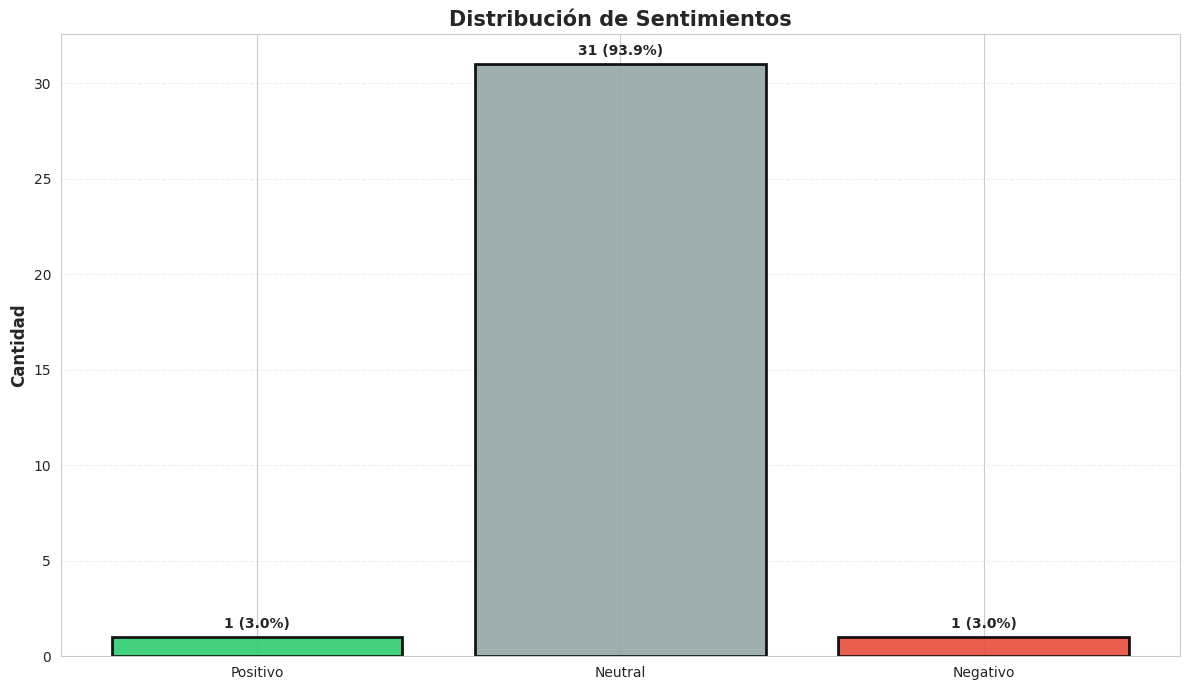


✅ ANÁLISIS COMPLETADO (sin guardar archivos)


In [7]:
"""
ANÁLISIS DE SENTIMIENTO - TWEETS PERÚ
Lee TXT de GitHub (RAW), crea DataFrame por líneas y muestra resultados (sin guardar archivos)
"""

import re
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

print("=" * 70)
print("ANÁLISIS DE SENTIMIENTO - TWEETS PERÚ")
print("=" * 70)

# ------------------ Clasificador simple por palabras clave ------------------
def clasificar_sentimiento(texto: str) -> str:
    texto = str(texto).lower()
    positivas = [
        'apoyo','excelente','ganar','mejor','cambio','justicia',
        'verdadero cambio','nueva era','por fin','ahora a trabajar','fortalecer','responsable'
    ]
    negativas = [
        'no confío','escándalo','no merece','corrupción','falsas','desgracia','culpa',
        'amenaza','aterrorizados','inseguridad','extorsión','sicariato','impunidad',
        'cansados','atentado','corrupto','mafiosos','cáncer'
    ]
    pos = any(p in texto for p in positivas)
    neg = any(n in texto for n in negativas)
    if pos and not neg: return 'Positivo'
    if neg and not pos: return 'Negativo'
    if pos and neg:     return 'Neutral'
    return 'Neutral'

# ------------------ Descargar contenido ------------------
print("\n🌐 Descargando archivo desde GitHub (RAW)...")
url = "https://raw.githubusercontent.com/santiagonajera/Ejemplos-royectosDataScience/main/eleeciopnesPeru.txt"

r = requests.get(url, timeout=30)
r.raise_for_status()
try:
    contenido = r.content.decode("utf-8-sig")
except UnicodeDecodeError:
    contenido = r.content.decode(r.apparent_encoding or "utf-8", errors="replace")

print(f"✓ Archivo descargado ({len(r.content)} bytes)")

# ------------------ Parseo robusto ------------------
# 1) Intento TSV rápido
df = None
try:
    tmp = pd.read_csv(StringIO(contenido), sep="\t", on_bad_lines="skip")
    # Si sólo hay 1 columna, es indicio de que NO está tabulado realmente.
    if tmp.shape[1] >= 2 and 'text' in tmp.columns:
        df = tmp
        print("✓ Parseado como TSV con columna 'text'.")
except Exception:
    pass

# 2) Fallback por líneas (para este archivo)
if df is None:
    # Cortar por líneas, limpiar vacíos y ruido básico
    lineas = [ln.strip() for ln in contenido.splitlines() if ln.strip()]

    # Opcional: filtrar líneas “ruido” típicas del corpus
    # - Prefijos tipo "De sitio.com"
    # - URLs sueltas
    # - Líneas con solo fecha/hora o bullet decorativo
    patron_url = re.compile(r'https?://\S+', flags=re.I)
    def es_ruido(ln: str) -> bool:
        if patron_url.search(ln): return False  # si hay URL queremos mantenerlo a veces
        if ln.lower().startswith("de "): return True
        if ln in ("·",): return True
        if ln.endswith("·"): return True
        # líneas tipo "5 oct." / "29 sept." / "3h" / "5h"
        if re.fullmatch(r'(\d{1,2}\s*\w+\.?)|(\d{1,2}h)|(\d{1,2}\s*oct\.)|(\d{1,2}\s*sept\.)', ln.lower()):
            return True
        return False

    lineas = [ln for ln in lineas if not es_ruido(ln)]

    # Construir DataFrame
    df = pd.DataFrame({"text": lineas})
    df.insert(0, "id", range(1, len(df) + 1))
    print("✓ Parseado por líneas (fallback).")

print(f"\n📋 Columnas: {list(df.columns)}")
print(f"📊 Total de filas: {len(df)}")

# Normalizar columnas mínimas
if 'text' not in df.columns:
    if df.shape[1] == 1:
        df.columns = ['text']
        df.insert(0, 'id', range(1, len(df) + 1))
        print("⚠️ No había 'text'; se tomó la única columna como 'text'.")
    elif df.shape[1] >= 2:
        df = df.rename(columns={df.columns[1]: 'text'})
        if 'id' not in df.columns:
            df = df.rename(columns={df.columns[0]: 'id'})
        print("⚠️ Renombradas columnas a ['id','text',...].")
    else:
        raise ValueError("No se pudo identificar columna de texto.")

# Limpiar texto (opcional, sencillo)
def limpiar(t: str) -> str:
    t = re.sub(r'\s+', ' ', str(t)).strip()
    return t

df['text'] = df['text'].astype(str).map(limpiar)
df = df[df['text'].str.len() > 0].reset_index(drop=True)

# ------------------ Análisis de sentimiento ------------------
print("\n🔍 Analizando sentimientos...")
df['sentimiento'] = df['text'].apply(clasificar_sentimiento)
print("✓ Análisis completado.")

# ------------------ Resultados en consola ------------------
print("\n" + "=" * 70)
print("RESULTADOS DEL ANÁLISIS")
print("=" * 70)

sent_counts = df['sentimiento'].value_counts()
print("\n📊 Distribución de sentimientos:")
print(sent_counts)

print("\n📈 Porcentajes:")
pct = (sent_counts / len(df) * 100).round(1)
for s, v in pct.items():
    print(f"  {s}: {v:.1f}%")

print(f"\n📝 Total de textos analizados: {len(df)}")

print("\n" + "=" * 70)
print("MUESTRA (primeros 10):")
print("=" * 70)
print(df[['id','text','sentimiento']].head(10).to_string(index=False))

# ------------------ Visualizaciones (sin guardar) ------------------
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

colors = {'Positivo': '#2ecc71', 'Negativo': '#e74c3c', 'Neutral': '#95a5a6'}
order = ['Positivo','Neutral','Negativo']
presentes = [s for s in order if s in sent_counts.index]
vals = sent_counts.reindex(presentes)

plt.figure()
bars = plt.bar(presentes, vals.values, edgecolor='black',
               linewidth=2, alpha=0.9,
               color=[colors[s] for s in presentes])
plt.title('Distribución de Sentimientos', fontsize=15, fontweight='bold')
plt.ylabel('Cantidad', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')
total = len(df)
for b, v in zip(bars, vals.values):
    p = v / total * 100 if total else 0
    plt.text(b.get_x() + b.get_width()/2, b.get_height() + 0.3,
             f'{v} ({p:.1f}%)', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("✅ ANÁLISIS COMPLETADO (sin guardar archivos)")
print("=" * 70)


ANÁLISIS DE SENTIMIENTO - TWEETS PERÚ (fuzzy)

🌐 Descargando archivo desde GitHub (RAW)...
✓ Archivo descargado (208888 bytes)

📋 Columnas: ['id', 'text']
📊 Total de filas: 1563

🔍 Analizando sentimientos (fuzzy)...
✓ Análisis completado.

RESULTADOS DEL ANÁLISIS

📊 Distribución de sentimientos:
sentimiento
Neutral     1562
Positivo       1
Name: count, dtype: int64

📈 Porcentajes:
  Neutral: 99.9%
  Positivo: 0.1%

📝 Total de textos analizados: 1563

MUESTRA (primeros 10):
 id                                                                   text sentimiento
  1                                                        <!DOCTYPE html>     Neutral
  2                                                                  <html     Neutral
  3                                                              lang="en"     Neutral
  4 data-color-mode="auto" data-light-theme="light" data-dark-theme="dark"     Neutral
  5    data-a11y-animated-images="system" data-a11y-link-underlines="true"     Neutral

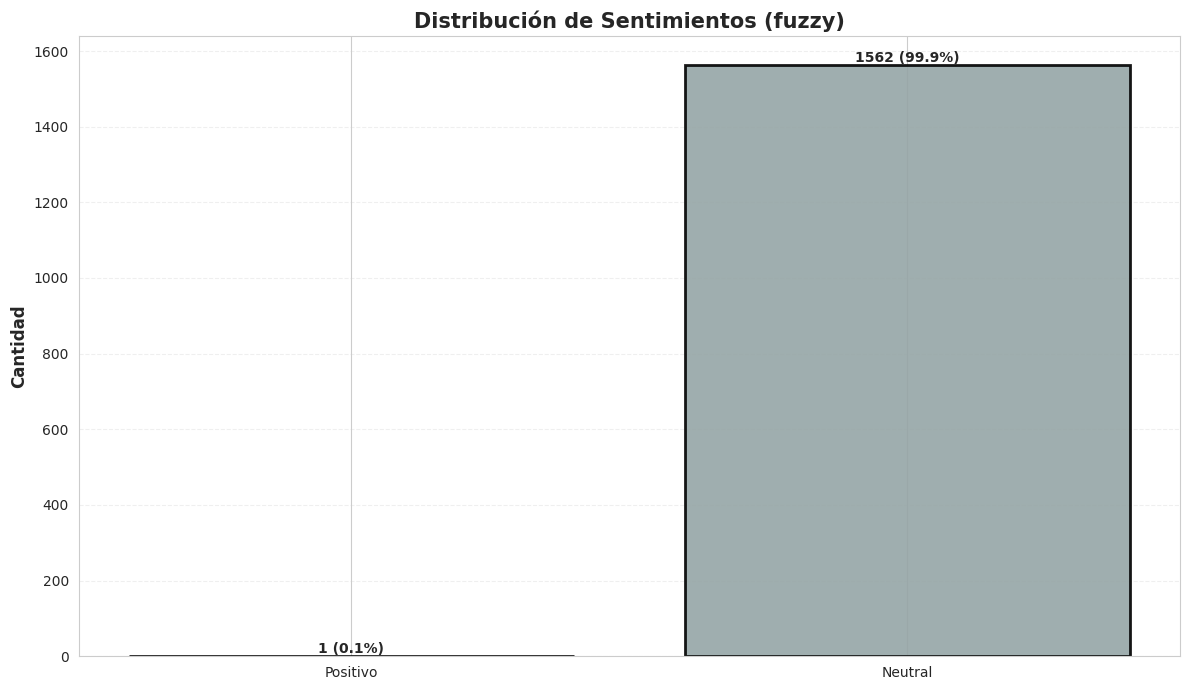


✅ ANÁLISIS COMPLETADO (sin guardar archivos)


In [9]:
"""
ANÁLISIS DE SENTIMIENTO - TWEETS PERÚ (robusto a escritura difusa)
- Lee TXT desde GitHub (RAW)
- Parseo por líneas con limpieza de ruido
- Normalización fuzzy: leetspeak, acentos, elongaciones, risas, emojis, negaciones
- Clasificador rule-based con ventana de negación y emojis
- Muestra resultados y gráficos (sin guardar archivos)
"""

import re
import unicodedata
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from collections import Counter

print("=" * 70)
print("ANÁLISIS DE SENTIMIENTO - TWEETS PERÚ (fuzzy)")
print("=" * 70)

# ------------------ Utilidades de normalización ------------------
LEET_MAP = str.maketrans({
    '4': 'a', '3': 'e', '1': 'i', '0': 'o', '5': 's', '7': 't',
    '@': 'a', '$': 's', '!': 'i', '€': 'e'
})

URL_RE   = re.compile(r'https?://\S+|www\.\S+', re.I)
MENT_RE  = re.compile(r'(?<=\s)@\w+|^@\w+')
HASH_RE  = re.compile(r'#(\w+)')
LAUGH_RE = re.compile(r'\b(ja|je|ji|jo|ju|ha|he|hi|ho|hu){2,}\b', re.I)
ELONG_RE = re.compile(r'(.)\1{2,}', re.I)  # 'bueeeno' -> 'bueeno'
PUNCT_RE = re.compile(r'([!?.,;:])\1{1,}')
SPACE_RE = re.compile(r'\s+')

# Emojis (conjunto mínimo pero útil)
POS_EMOJI = set(list("😀😃😄😁😆🙂😊😍🥰🤩😺👍👌👏💪✨✅🔥⭐️🎉🥳❤️💙💚💛💜🤝🙌"))
NEG_EMOJI = set(list("😞😟😠😡🤬😢😭💀☠️👎🤮🤢⚠️❌🚫😱😨😰🫤"))

def strip_accents(s: str) -> str:
    # Quitar diacríticos
    return ''.join(c for c in unicodedata.normalize('NFKD', s) if not unicodedata.combining(c))

def normalize_fuzzy(text: str) -> str:
    if not isinstance(text, str):
        text = str(text)

    # Preservar emojis para contarlos luego
    emojis = ''.join(ch for ch in text if ch in POS_EMOJI or ch in NEG_EMOJI)

    # Limpiezas básicas
    text = URL_RE.sub(' ', text)
    text = MENT_RE.sub(' ', text)
    # hashtags: nos quedamos con la palabra (#Elecciones -> elecciones)
    text = HASH_RE.sub(lambda m: f' {m.group(1)} ', text)

    # Lower + transliteración
    text = text.translate(LEET_MAP)
    text = strip_accents(text.lower())

    # Normalizaciones adicionales
    text = LAUGH_RE.sub(' risas ', text)         # risas como token neutro
    text = ELONG_RE.sub(r'\1\1', text)           # reducir elongaciones a máx 2
    text = PUNCT_RE.sub(r'\1', text)             # colapsar signos repetidos
    text = SPACE_RE.sub(' ', text).strip()

    return text, emojis

# ------------------ Diccionarios (regex fuzzy) ------------------
# Usamos patrones con tolerancia a variaciones (apoyo/apoya/apoyar, corrupcion/corrupto, etc.)
POS_PATTERNS = [
    r'\bapoy[aoi]{1,2}\b', r'\bexcelent[ea]?\b', r'\bgan(ar|a|o)\b',
    r'\bmej(or|ora[rs]?)\b', r'\bcambi[oa]s?\b', r'\bjustici[ao]?\b',
    r'\bfortalec(er|e|e[ns]?)\b', r'\bresponsabl(e|idad)\b',
    r'\bprogres[oa]?\b', r'\bcrecimient[oa]?\b', r'\bavance\b', r'\btrabaj[oa]r?\b'
]
NEG_PATTERNS = [
    r'\bno\s+confi[oai]\b', r'\besc[aá]ndal[oa]s?\b', r'\bno\s+merec[ea]\b',
    r'\bcorrup(ci[oó]n|to[s]?)\b', r'\bfals[oa]s?\b', r'\bdesgraci[ao]s?\b',
    r'\bculp(a|able[s]?)\b', r'\bamenaz[ao]s?\b', r'\binsegurid[ao]\b',
    r'\bextorsi[oó]n\b', r'\bsicariat[o]\b', r'\bimpunidad(es)?\b',
    r'\bcansad[oa]s?\b', r'\batentad[oa]s?\b', r'\bmafios[oa]s?\b',
    r'\bcorrupt[oa]s?\b', r'\bcrisis\b', r'\bfracaso\b', r'\bincapaz\b'
]
# Aceleradores (palabras muy negativas que pesan más)
HARD_NEG = [r'\bmuerte\b', r'\bterror(is[mo])?\b', r'\bviolencia\b']

POS_RX = [re.compile(p) for p in POS_PATTERNS]
NEG_RX = [re.compile(p) for p in NEG_PATTERNS]
HARD_NEG_RX = [re.compile(p) for p in HARD_NEG]

NEGATORS = set(['no','nunca','jamas','sin'])
WINDOW = 3  # ventana de negación en tokens

def count_emojis(emojis: str) -> tuple[int, int]:
    pos = sum(1 for ch in emojis if ch in POS_EMOJI)
    neg = sum(1 for ch in emojis if ch in NEG_EMOJI)
    return pos, neg

def apply_negation(tokens, idx):
    # Si hay un negador en las últimas 'WINDOW' posiciones, se invierte
    start = max(0, idx - WINDOW)
    context = tokens[start:idx]
    return any(tok in NEGATORS for tok in context)

def fuzzy_rule_based_sentiment(text: str) -> str:
    norm, emojis = normalize_fuzzy(text)
    tokens = norm.split()

    # Conteo por patrones con ventana de negación
    pos_score = 0.0
    neg_score = 0.0

    for i, tok in enumerate(tokens):
        # Evaluar POS
        for rx in POS_RX:
            if rx.search(tok):
                if apply_negation(tokens, i):
                    neg_score += 1.0  # negación invierte
                else:
                    pos_score += 1.0
                break
        # Evaluar NEG
        for rx in NEG_RX:
            if rx.search(tok):
                if apply_negation(tokens, i):
                    pos_score += 1.0
                else:
                    neg_score += 1.0
                break
        # Negativos fuertes
        for rx in HARD_NEG_RX:
            if rx.search(tok):
                if apply_negation(tokens, i):
                    pos_score += 1.5
                else:
                    neg_score += 1.5
                break

    # Emojis ponderan menos que palabras
    pe, ne = count_emojis(emojis)
    pos_score += 0.5 * pe
    neg_score += 0.5 * ne

    # Heurística: si menciona explícitamente “fortalecer democracia / voto responsable”
    if 'fortalec' in norm and ('democracia' in norm or 'voto responsable' in norm):
        pos_score += 0.75

    # Decisión final
    if pos_score - neg_score > 0.5:
        return 'Positivo'
    elif neg_score - pos_score > 0.5:
        return 'Negativo'
    else:
        return 'Neutral'

# ------------------ Descargar contenido ------------------
print("\n🌐 Descargando archivo desde GitHub (RAW)...")
url = "https://github.com/santiagonajera/Ejemplos-royectosDataScience/blob/main/eleccionesBol2026.txt"
r = requests.get(url, timeout=30)
r.raise_for_status()
try:
    contenido = r.content.decode("utf-8-sig")
except UnicodeDecodeError:
    contenido = r.content.decode(r.apparent_encoding or "utf-8", errors="replace")
print(f"✓ Archivo descargado ({len(r.content)} bytes)")

# ------------------ Parseo por líneas con limpieza de ruido ------------------
lineas = [ln.strip() for ln in contenido.splitlines()]
lineas = [ln for ln in lineas if ln]  # quitar vacías

# Ruido típico
def es_ruido(ln: str) -> bool:
    # líneas separadoras, bullets sueltos, puntos medios, “·”
    if ln.strip() in ("·", "-", "—", "•"): return True
    # solo horas/fechas cortas (3h, 5h, 5 oct., 29 sept.)
    if re.fullmatch(r'(\d{1,2}h)|(\d{1,2}\s*(ene|feb|mar|abr|may|jun|jul|ago|sept|set|oct|nov|dic)\.?)', ln.lower()):
        return True
    # Prefijo "De sitio.com" (los mantenemos si necesitas fuente, pero por default ruido)
    if ln.lower().startswith("de "): return True
    return False

lineas = [ln for ln in lineas if not es_ruido(ln)]

# Construir DataFrame
df = pd.DataFrame({"text": lineas})
df.insert(0, "id", range(1, len(df) + 1))

print(f"\n📋 Columnas: {list(df.columns)}")
print(f"📊 Total de filas: {len(df)}")

# Limpieza mínima final
def limpiar(t: str) -> str:
    t = re.sub(r'\s+', ' ', str(t)).strip()
    return t

df['text'] = df['text'].astype(str).map(limpiar)
df = df[df['text'].str.len() > 0].reset_index(drop=True)

# ------------------ Análisis de sentimiento (fuzzy) ------------------
print("\n🔍 Analizando sentimientos (fuzzy)...")
df['sentimiento'] = df['text'].apply(fuzzy_rule_based_sentiment)
print("✓ Análisis completado.")

# ------------------ Resultados en consola ------------------
print("\n" + "=" * 70)
print("RESULTADOS DEL ANÁLISIS")
print("=" * 70)

sent_counts = df['sentimiento'].value_counts()
print("\n📊 Distribución de sentimientos:")
print(sent_counts)

print("\n📈 Porcentajes:")
pct = (sent_counts / len(df) * 100).round(1)
for s, v in pct.items():
    print(f"  {s}: {v:.1f}%")

print(f"\n📝 Total de textos analizados: {len(df)}")

print("\n" + "=" * 70)
print("MUESTRA (primeros 10):")
print("=" * 70)
print(df[['id','text','sentimiento']].head(10).to_string(index=False))

# ------------------ Visualizaciones (sin guardar) ------------------
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

colors = {'Positivo': '#2ecc71', 'Negativo': '#e74c3c', 'Neutral': '#95a5a6'}
order = ['Positivo','Neutral','Negativo']
presentes = [s for s in order if s in sent_counts.index]
vals = sent_counts.reindex(presentes)

plt.figure()
bars = plt.bar(presentes, vals.values, edgecolor='black',
               linewidth=2, alpha=0.9,
               color=[colors[s] for s in presentes])
plt.title('Distribución de Sentimientos (fuzzy)', fontsize=15, fontweight='bold')
plt.ylabel('Cantidad', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')
total = len(df)
for b, v in zip(bars, vals.values):
    p = v / total * 100 if total else 0
    plt.text(b.get_x() + b.get_width()/2, b.get_height() + 0.3,
             f'{v} ({p:.1f}%)', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("✅ ANÁLISIS COMPLETADO (sin guardar archivos)")
print("=" * 70)


INFORME SIMPLE

Registros: 1563
Distribución:
 sentimiento
Neutral     1562
Positivo       1
Porcentajes:
  Neutral: 99.9%
  Positivo: 0.1%

Muestra (8 filas):
 id                                                                   text sentimiento
  1                                                        <!DOCTYPE html>     Neutral
  2                                                                  <html     Neutral
  3                                                              lang="en"     Neutral
  4 data-color-mode="auto" data-light-theme="light" data-dark-theme="dark"     Neutral
  5    data-a11y-animated-images="system" data-a11y-link-underlines="true"     Neutral
  6                                                                      >     Neutral
  7                                                                 <head>     Neutral
  8                                                 <meta charset="utf-8">     Neutral


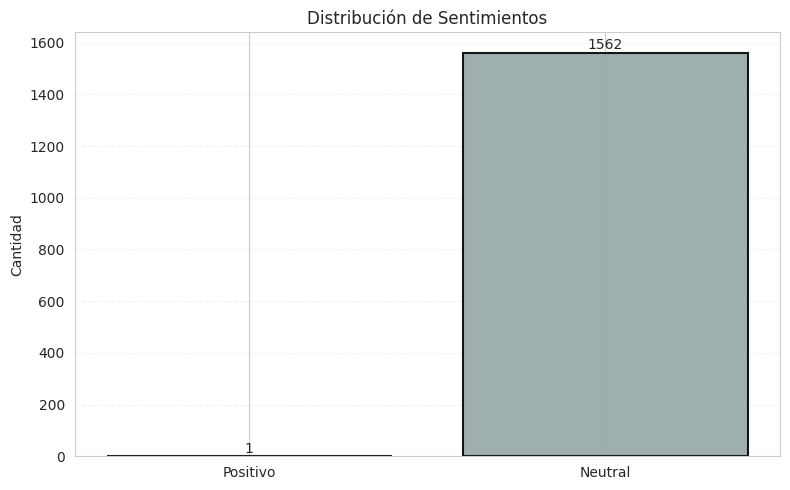

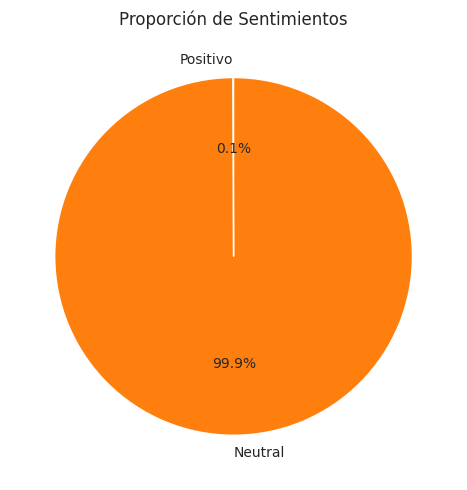

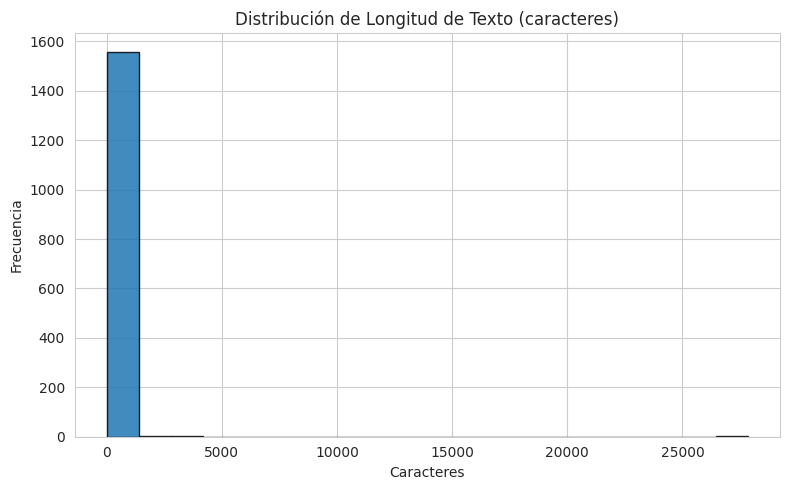


✅ Informe simple generado (solo visualización, sin archivos).


In [11]:
"""
ANÁLISIS DE SENTIMIENTO - TWEETS PERÚ (simple + gráficos compactos)
- Descarga desde GitHub RAW
- Parser por líneas (robusto a escritura difusa)
- Informe compacto en consola
- 3 gráficos pequeños: barras (sentimientos), pastel (%), histograma (longitud)
"""

import re, unicodedata, requests, pandas as pd
import matplotlib.pyplot as plt

# ------------------ Normalización “fuzzy” ------------------
LEET_MAP = str.maketrans({'4':'a','3':'e','1':'i','0':'o','5':'s','7':'t','@':'a','$':'s','!':'i','€':'e'})
URL_RE   = re.compile(r'https?://\S+|www\.\S+', re.I)
MENT_RE  = re.compile(r'(?<=\s)@\w+|^@\w+')
HASH_RE  = re.compile(r'#(\w+)')
LAUGH_RE = re.compile(r'\b(ja|je|ji|jo|ju|ha|he|hi|ho|hu){2,}\b', re.I)
ELONG_RE = re.compile(r'(.)\1{2,}', re.I)
SPACE_RE = re.compile(r'\s+')
POS_EMOJI = set(list("😀😃😄😁😆🙂😊😍🥰🤩😺👍👌👏💪✨✅🔥⭐️🎉🥳❤️💙💚💛💜🤝🙌"))
NEG_EMOJI = set(list("😞😟😠😡🤬😢😭💀☠️👎🤮🤢⚠️❌🚫😱😨😰🫤"))

def strip_accents(s):
    return ''.join(c for c in unicodedata.normalize('NFKD', s) if not unicodedata.combining(c))

def normalize_fuzzy(text):
    if not isinstance(text, str): text = str(text)
    emojis = ''.join(ch for ch in text if ch in POS_EMOJI or ch in NEG_EMOJI)
    text = URL_RE.sub(' ', text)
    text = MENT_RE.sub(' ', text)
    text = HASH_RE.sub(lambda m: f' {m.group(1)} ', text)
    text = text.translate(LEET_MAP)
    text = strip_accents(text.lower())
    text = LAUGH_RE.sub(' risas ', text)
    text = ELONG_RE.sub(r'\1\1', text)
    text = SPACE_RE.sub(' ', text).strip()
    return text, emojis

# ------------------ Diccionarios y clasificador ------------------
POS_PATTERNS = [r'\bapoy[aoi]{1,2}\b', r'\bexcelent[ea]?\b', r'\bgan(ar|a|o)\b',
                r'\bmej(or|ora[rs]?)\b', r'\bcambi[oa]s?\b', r'\bjustici[ao]?\b',
                r'\bfortalec(er|e|e[ns]?)\b', r'\bresponsabl(e|idad)\b']
NEG_PATTERNS = [r'\bno\s+confi[oai]\b', r'\besc[aá]ndal[oa]s?\b', r'\bno\s+merec[ea]\b',
                r'\bcorrup(ci[oó]n|to[s]?)\b', r'\bfals[oa]s?\b', r'\bdesgraci[ao]s?\b',
                r'\bculp(a|able[s]?)\b', r'\bamenaz[ao]s?\b', r'\binsegurid[ao]\b',
                r'\bextorsi[oó]n\b', r'\bsicariat[o]\b', r'\bimpunidad(es)?\b',
                r'\bcansad[oa]s?\b', r'\batentad[oa]s?\b', r'\bmafios[oa]s?\b',
                r'\bcorrupt[oa]s?\b']
HARD_NEG = [r'\bmuerte\b', r'\bterror(ismo)?\b', r'\bviolencia\b']
POS_RX = [re.compile(p) for p in POS_PATTERNS]
NEG_RX = [re.compile(p) for p in NEG_PATTERNS]
HARD_NEG_RX = [re.compile(p) for p in HARD_NEG]
NEGATORS = {'no','nunca','jamas','sin'}
WINDOW = 3

def count_emojis(emojis):
    pe = sum(1 for ch in emojis if ch in POS_EMOJI)
    ne = sum(1 for ch in emojis if ch in NEG_EMOJI)
    return pe, ne

def negated(tokens, idx):
    start = max(0, idx - WINDOW)
    return any(tok in NEGATORS for tok in tokens[start:idx])

def fuzzy_sentiment(text):
    norm, emojis = normalize_fuzzy(text)
    tokens = norm.split()
    pos, neg = 0.0, 0.0
    for i, tok in enumerate(tokens):
        if any(rx.search(tok) for rx in POS_RX):
            pos += 1.0 if not negated(tokens, i) else -1.0
        if any(rx.search(tok) for rx in NEG_RX):
            neg += 1.0 if not negated(tokens, i) else -1.0
        if any(rx.search(tok) for rx in HARD_NEG_RX):
            neg += 1.5 if not negated(tokens, i) else -1.5
    pe, ne = count_emojis(emojis)
    pos += 0.5 * pe; neg += 0.5 * ne
    if pos - neg > 0.5: return 'Positivo'
    if neg - pos > 0.5: return 'Negativo'
    return 'Neutral'

# ------------------ Descarga y parsing simple ------------------
print("="*60, "\nINFORME SIMPLE")
url = "https://github.com/santiagonajera/Ejemplos-royectosDataScience/blob/main/eleccionesBol2026.txt"
r = requests.get(url, timeout=30); r.raise_for_status()
txt = r.content.decode("utf-8-sig", errors="replace")

# Líneas útiles (quitamos separadores, “De …”, tiempos tipo “5h”, “5 oct.”)
raw_lines = [ln.strip() for ln in txt.splitlines()]
def ruido(ln):
    if not ln: return True
    if ln in ("·","-","—","•"): return True
    if ln.lower().startswith("de "): return True
    if re.fullmatch(r'(\d{1,2}h)|(\d{1,2}\s*(ene|feb|mar|abr|may|jun|jul|ago|sept|set|oct|nov|dic)\.?)', ln.lower()):
        return True
    return False
lines = [ln for ln in raw_lines if not ruido(ln)]

df = pd.DataFrame({"text": lines})
df.insert(0, "id", range(1, len(df)+1))

# Sentimiento
df["sentimiento"] = df["text"].apply(fuzzy_sentiment)

# ------------------ Informe compacto ------------------
counts = df["sentimiento"].value_counts()
pct = (counts / len(df) * 100).round(1)
print(f"\nRegistros: {len(df)}")
print("Distribución:\n", counts.to_string())
print("Porcentajes:")
for s, v in pct.items():
    print(f"  {s}: {v:.1f}%")
print("\nMuestra (8 filas):")
print(df[["id","text","sentimiento"]].head(8).to_string(index=False))

# ------------------ Gráficos pequeños (3) ------------------
plt.rcParams["figure.figsize"] = (8, 5)   # tamaño reducido
plt.rcParams["figure.dpi"] = 100
colors = {'Positivo':'#2ecc71','Negativo':'#e74c3c','Neutral':'#95a5a6'}

# 1) Barras sentimientos
plt.figure()
order = [s for s in ["Positivo","Neutral","Negativo"] if s in counts]
vals = counts.reindex(order)
bars = plt.bar(order, vals.values, edgecolor='black', linewidth=1.5,
               color=[colors[s] for s in order], alpha=0.9)
for b, v in zip(bars, vals.values):
    plt.text(b.get_x()+b.get_width()/2, b.get_height()+0.2, f'{v}', ha='center', va='bottom')
plt.title("Distribución de Sentimientos")
plt.ylabel("Cantidad"); plt.grid(axis='y', alpha=0.25, linestyle='--')
plt.tight_layout(); plt.show()

# 2) Pastel porcentajes (ADICIONAL)
plt.figure()
plt.pie(vals.values, labels=order, autopct='%1.1f%%', startangle=90,
        wedgeprops=dict(edgecolor='white'), textprops={'fontsize':10})
plt.title("Proporción de Sentimientos")
plt.tight_layout(); plt.show()

# 3) Histograma longitud de texto (ADICIONAL)
plt.figure()
lengths = df["text"].astype(str).map(len)
plt.hist(lengths, bins=20, edgecolor='black', alpha=0.85)
plt.title("Distribución de Longitud de Texto (caracteres)")
plt.xlabel("Caracteres"); plt.ylabel("Frecuencia")
plt.tight_layout(); plt.show()

print("\n✅ Informe simple generado (solo visualización, sin archivos).")


In [12]:
"""
ANÁLISIS DE SENTIMIENTO - ELECCIONES BOLIVIA 2026 (fuzzy, diccionario ampliado)
- Lee TXT desde GitHub (RAW)
- Parser por líneas + limpieza de ruido
- Normalización: leetspeak, acentos, elongaciones, risas, hashtags, negaciones, emojis
- Diccionario ampliado (Bolivia): MAS, CC, Creemos, OEP/TSE, 21F, fraude 2019, bloqueos, etc.
- Informe compacto y 3 gráficos pequeños (sin guardar archivos)
"""

import re, unicodedata, requests, pandas as pd
import matplotlib.pyplot as plt

# ------------------ Normalización “fuzzy” ------------------
LEET_MAP = str.maketrans({'4':'a','3':'e','1':'i','0':'o','5':'s','7':'t','@':'a','$':'s','!':'i','€':'e'})
URL_RE   = re.compile(r'https?://\S+|www\.\S+', re.I)
MENT_RE  = re.compile(r'(?<=\s)@\w+|^@\w+')
HASH_RE  = re.compile(r'#(\w+)')
LAUGH_RE = re.compile(r'\b(ja|je|ji|jo|ju|ha|he|hi|ho|hu){2,}\b', re.I)
ELONG_RE = re.compile(r'(.)\1{2,}', re.I)
SPACE_RE = re.compile(r'\s+')
POS_EMOJI = set(list("😀😃😄😁😆🙂😊😍🥰🤩😺👍👌👏💪✨✅🔥⭐️🎉🥳❤️💙💚💛💜🤝🙌"))
NEG_EMOJI = set(list("😞😟😠😡🤬😢😭💀☠️👎🤮🤢⚠️❌🚫😱😨😰🫤"))

def strip_accents(s):
    return ''.join(c for c in unicodedata.normalize('NFKD', s) if not unicodedata.combining(c))

def normalize_fuzzy(text):
    if not isinstance(text, str): text = str(text)
    emojis = ''.join(ch for ch in text if ch in POS_EMOJI or ch in NEG_EMOJI)
    text = URL_RE.sub(' ', text)
    text = MENT_RE.sub(' ', text)
    text = HASH_RE.sub(lambda m: f' {m.group(1)} ', text)
    text = text.translate(LEET_MAP)
    text = strip_accents(text.lower())
    text = LAUGH_RE.sub(' risas ', text)
    text = ELONG_RE.sub(r'\1\1', text)
    text = SPACE_RE.sub(' ', text).strip()
    return text, emojis

# ------------------ Diccionarios Bolivia (ampliados) ------------------
# Positivas (apoyo, democracia, institucionalidad, propuestas, economía, paz, transparencia, etc.)
POS_PATTERNS = [
    r'\bapoy[aoi]{1,2}\b', r'\brespald[oa]s?\b', r'\bgan(ar|a|o)\b', r'\bmej(or|ora[rs]?)\b',
    r'\bcambi[oa]s?\b', r'\bjustici[ao]?\b', r'\bunitari[oa]s?\b', r'\bunid[oa]s?\b',
    r'\bdialog[oa]s?\b', r'\bacue?rd[oa]s?\b', r'\bconsens[oa]s?\b', r'\bpac[íi]fic[oa]\b',
    r'\bpropuest(as|a)\b', r'\bplan(es)? de gobierno\b', r'\bprograma\b', r'\bgestion\b',
    r'\btransparenc[ia]\b', r'\bveedur[ia]\b', r'\bobservaci[oó]n internacional\b',
    r'\bfortalec(er|e|e[ns]?)\b', r'\binstitucionalidad\b', r'\bestado de derecho\b',
    r'\bdemocraci[ae]\b', r'\bvoto informado\b', r'\bvoto responsable\b',
    r'\bparticipaci[oó]n\b', r'\bciudadan[oa]s?\b', r'\bjuventud(es)?\b',
    r'\bdesarrollo\b', r'\bcrecimient[oa]?\b', r'\bemprend(?:er|imiento)s?\b',
    r'\bemple[o]\b', r'\bestabilid(?:ad|a\b)\b?', r'\binversion(es)?\b',
    r'\bproductiv[oa]\b', r'\bagro\b', r'\bseguridad alimentaria\b',
    r'\binclusi[oó]n\b', r'\bplurinacional\b', r'\brespeto a la wiphala\b',
    r'\bderechos\b', r'\bcohesi[oó]n\b', r'\breconciliaci[oó]n\b', r'\bunidad nacional\b',
    r'\bdebate serio\b', r'\bpropuestas s[óo]lidas\b', r'\bparticipar\b',
    # Bolivia instituciones y proceso
    r'\boep\b', r'\btse\b', r'\btribunal sup(?:erior|remo) electoral\b', r'\bpadr[oó]n biom[eé]trico\b',
    r'\btrep\b', r'\bactas digitalizadas\b', r'\bcapacitaci[oó]n de jurados\b',
    r'\bobservadores\b', r'\bmisiones electorales\b',
    # Positivas sobre economía/estabilidad
    r'\bestabilidad macro\b', r'\bexportaciones\b', r'\bturismo\b', r'\binnovaci[oó]n\b',
    r'\btecnolog[íi]a\b', r'\benerg[ií]as? limpias\b', r'\blitio\b', r'\bindustrializaci[oó]n\b',
]

# Negativas (fraude, corrupción, prorroguismo, bloqueos, violencia, crisis, narcotráfico, etc.)
NEG_PATTERNS = [
    r'\bno\s+confi[oai]\b', r'\bno\s+sirv[ea]\b', r'\bno\s+merec[ea]\b',
    r'\besc[aá]ndal[oa]s?\b', r'\bcorrup(ci[oó]n|to[s]?)\b', r'\bcoima(s)?\b', r'\bsoborno(s)?\b',
    r'\bclientelism[o]\b', r'\bimpunidad(es)?\b', r'\bnepotism[o]\b', r'\btr[aá]fico de influencias\b',
    r'\bfraude\b', r'\bmanipulaci[oó]n\b', r'\bquema de actas\b', r'\bquema de tribunales\b',
    r'\bpadr[oó]n inflado\b', r'\bactas adulteradas\b', r'\btrep ca[íi]do\b',
    r'\bprorrog[uú]ism[o]\b', r'\bilegitim[oa]\b', r'\busurpaci[oó]n\b',
    r'\bviolenc[iae]\b', r'\benfrentamientos?\b', r'\bchoques?\b', r'\brepresi[oó]n\b',
    r'\bcrisis\b', r'\bcolapso\b', r'\bdesastre\b', r'\bfracaso\b', r'\bincapacidad\b',
    r'\binsegurid[ao]\b', r'\bdelincuencia\b', r'\bnarcotr[aá]fico\b', r'\bcocaina\b',
    r'\bcontrabando\b', r'\bextorsi[oó]n\b', r'\bsicariat[o]\b',
    r'\bbloqueos?\b', r'\bparos?\b', r'\bpiquetes?\b', r'\bdesabastecimient[o]\b',
    r'\babus[oa]\b', r'\barticul[o]\s*168\b', r'\b21f\b', r'\bpititas?\b', r'\bgolpe\b',
    r'\bdictadura\b', r'\bautoritarism[o]\b', r'\bpolarizaci[oó]n\b', r'\bodio\b',
    r'\bdiscurso de odio\b', r'\bdiscriminaci[oó]n\b', r'\bracism[o]\b',
    r'\bfraude 2019\b', r'\b2019 fue fraude\b', r'\bno hubo fraude\b',  # cualquiera polariza
    r'\bboletas pre marcadas\b', r'\bactas sin firmas\b',
    # dirigencias / partidos en tono negativo (genérico; el clasificador pondera por contexto)
    r'\bmas(?:-ipsp)?\b', r'\bcreemos\b', r'\bcomunidad ciudadana\b', r'\bcc\b',
    r'\bdisidencias?\b', r'\bquiebre\b', r'\bfractur[ao]s?\b', r'\bboicot\b', r'\btrampa\b',
    r'\bodio\b', r'\bamenaza(s)?\b',
]

# Negativos fuertes (pesar mayor)
HARD_NEG = [
    r'\bmuerte(s)?\b', r'\basesinat[oa]s?\b', r'\bterror(ismo)?\b', r'\bmasacre(s)?\b',
    r'\bcarcel\b', r'\bpersecuci[oó]n\b', r'\btortura\b'
]

POS_RX = [re.compile(p) for p in POS_PATTERNS]
NEG_RX = [re.compile(p) for p in NEG_PATTERNS]
HARD_NEG_RX = [re.compile(p) for p in HARD_NEG]

NEGATORS = {'no','nunca','jamas','sin'}
WINDOW = 3

def count_emojis(emojis):
    pe = sum(1 for ch in emojis if ch in POS_EMOJI)
    ne = sum(1 for ch in emojis if ch in NEG_EMOJI)
    return pe, ne

def negated(tokens, idx):
    start = max(0, idx - WINDOW)
    return any(tok in NEGATORS for tok in tokens[start:idx])

def fuzzy_sentiment(text):
    norm, emojis = normalize_fuzzy(text)
    tokens = norm.split()
    pos, neg = 0.0, 0.0
    for i, tok in enumerate(tokens):
        if any(rx.search(tok) for rx in POS_RX):
            pos += 1.0 if not negated(tokens, i) else -1.0
        if any(rx.search(tok) for rx in NEG_RX):
            neg += 1.0 if not negated(tokens, i) else -1.0
        if any(rx.search(tok) for rx in HARD_NEG_RX):
            neg += 1.5 if not negated(tokens, i) else -1.5
    pe, ne = count_emojis(emojis)
    pos += 0.5 * pe; neg += 0.5 * ne
    if pos - neg > 0.5: return 'Positivo'
    if neg - pos > 0.5: return 'Negativo'
    return 'Neutral'

# ------------------ Descarga y parsing simple (BOL 2026) ------------------
print("="*60, "\nINFORME SIMPLE - BOLIVIA 2026")
url = "https://raw.githubusercontent.com/santiagonajera/Ejemplos-royectosDataScience/main/eleccionesBol2026.txt"
r = requests.get(url, timeout=30); r.raise_for_status()
txt = r.content.decode("utf-8-sig", errors="replace")

# Líneas útiles (quitamos separadores, “De …”, tiempos tipo “5h”, “5 oct.”)
raw_lines = [ln.strip() for ln in txt.splitlines()]
def ruido(ln):
    if not ln: return True
    if ln in ("·","-","—","•"): return True
    if ln.lower().startswith("de "): return True
    # horas / fechas abreviadas típicas
    if re.fullmatch(r'(\d{1,2}h)|(\d{1,2}\s*(ene|feb|mar|abr|may|jun|jul|ago|sept|set|oct|nov|dic)\.?)', ln.lower()):
        return True
    return False
lines = [ln for ln in raw_lines if not ruido(ln)]

df = pd.DataFrame({"text": lines})
df.insert(0, "id", range(1, len(df)+1))

# Sentimiento
df["sentimiento"] = df["text"].apply(fuzzy_sentiment)

# ------------------ Informe compacto ------------------
counts = df["sentimiento"].value_counts()
pct = (counts / len(df) * 100).round(1)
print(f"\nRegistros: {len(df)}")
print("Distribución:\n", counts.to_string())
print("Porcentajes:")
for s, v in pct.items():
    print(f"  {s}: {v:.1f}%")
print("\nMuestra (8 filas):")
print(df[["id","text","sentimiento"]].head(8).to_string(index=False))

# ------------------ Gráficos pequeños (3) ------------------
plt.rcParams["figure.figsize"] = (8, 5)   # tamaño reducido
plt.rcParams["figure.dpi"] = 100
colors = {'Positivo':'#2ecc71','Negativo':'#e74c3c','Neutral':'#95a5a6'}

# 1) Barras sentimientos
import matplotlib.pyplot as plt
plt.figure()
order = [s for s in ["Positivo","Neutral","Negativo"] if s in counts]
vals = counts.reindex(order)
bars = plt.bar(order, vals.values, edgecolor='black', linewidth=1.5,
               color=[colors[s] for s in order], alpha=0.9)
for b, v in zip(bars, vals.values):
    plt.text(b.get_x()+b.get_width()/2, b.get_height()+0.2, f'{v}', ha='center', va='bottom')
plt.title("Distribución de Sentimientos (Bolivia 2026)")
plt.ylabel("Cantidad"); plt.grid(axis='y', alpha=0.25, linestyle='--')
plt.tight_layout(); plt.show()

# 2) Pastel porcentajes
plt.figure()
plt.pie(vals.values, labels=order, autopct='%1.1f%%', startangle=90,
        wedgeprops=dict(edgecolor='white'), textprops={'fontsize':10})
plt.title("Proporción de Sentimientos")
plt.tight_layout(); plt.show()

# 3) Histograma longitud de texto
plt.figure()
lengths = df["text"].astype(str).map(len)
plt.hist(lengths, bins=20, edgecolor='black', alpha=0.85)
plt.title("Distribución de Longitud de Texto (caracteres)")
plt.xlabel("Caracteres"); plt.ylabel("Frecuencia")
plt.tight_layout(); plt.show()

print("\n✅ Informe simple generado (solo visualización, sin archivos).")


error: nothing to repeat at position 23

<>:107: SyntaxWarning: invalid escape sequence '\s'
<>:107: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3383056314.py:107: SyntaxWarning: invalid escape sequence '\s'
  - espacios -> \s+ (tolerar múltiples espacios)


INFORME SIMPLE - BOLIVIA 2026

Registros: 95
Distribución:
 sentimiento
Neutral     51
Positivo    33
Negativo    11
Porcentajes:
  Neutral: 53.7%
  Positivo: 34.7%
  Negativo: 11.6%

Muestra (8 filas):
 id                                                                                                                                                                                                                                                                                                                                                                                                            text sentimiento
  1                                                                                                                                                                                                                                                                                                                                                                                      id,d

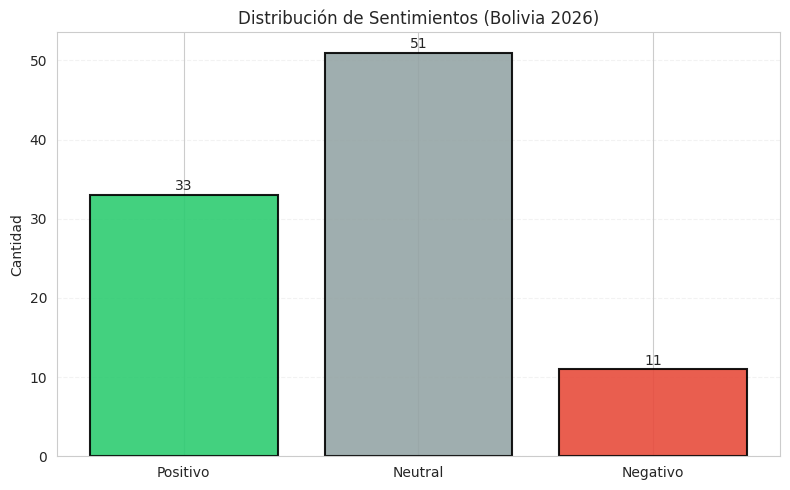

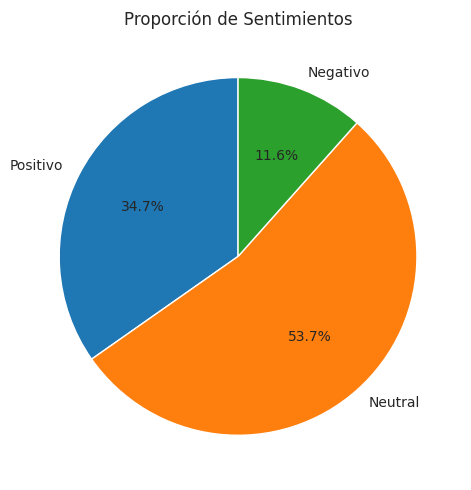

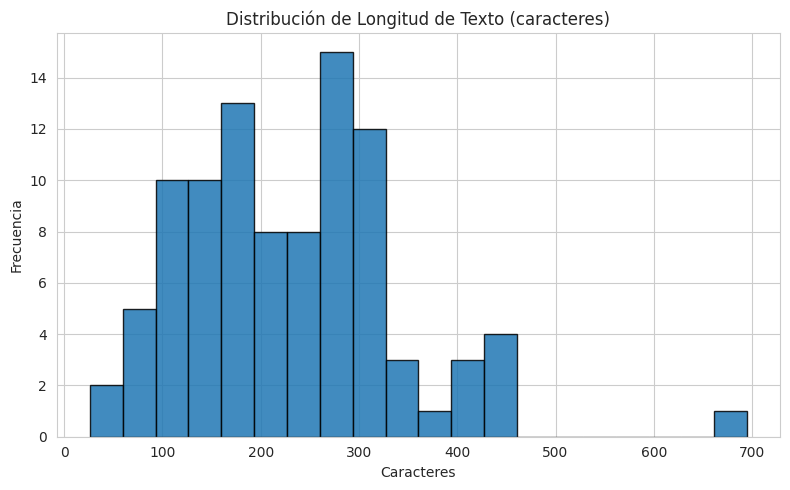


✅ Informe simple generado (solo visualización, sin archivos).


In [13]:
"""
ELECCIONES BOLIVIA 2026 — Análisis de Sentimiento (fuzzy, diccionario ampliado y seguro)
- Lectura RAW desde GitHub
- Parser por líneas + normalización (leetspeak, acentos, elongaciones, risas, hashtags, negaciones, emojis)
- Diccionario boliviano ampliado (triplicado) con compilación de regex segura
- Informe simple + 3 gráficos pequeños (sin guardar archivos)
"""

import re, unicodedata, requests, pandas as pd
import matplotlib.pyplot as plt

# =============== Normalización fuzzy ===============
LEET_MAP = str.maketrans({'4':'a','3':'e','1':'i','0':'o','5':'s','7':'t','@':'a','$':'s','!':'i','€':'e'})
URL_RE   = re.compile(r'https?://\S+|www\.\S+', re.I)
MENT_RE  = re.compile(r'(?<=\s)@\w+|^@\w+')
HASH_RE  = re.compile(r'#(\w+)')
LAUGH_RE = re.compile(r'\b(ja|je|ji|jo|ju|ha|he|hi|ho|hu){2,}\b', re.I)
ELONG_RE = re.compile(r'(.)\1{2,}', re.I)
SPACE_RE = re.compile(r'\s+')
POS_EMOJI = set(list("😀😃😄😁😆🙂😊😍🥰🤩😺👍👌👏💪✨✅🔥⭐️🎉🥳❤️💙💚💛💜🤝🙌"))
NEG_EMOJI = set(list("😞😟😠😡🤬😢😭💀☠️👎🤮🤢⚠️❌🚫😱😨😰🫤"))

def strip_accents(s):
    return ''.join(c for c in unicodedata.normalize('NFKD', s) if not unicodedata.combining(c))

def normalize_fuzzy(text):
    if not isinstance(text, str): text = str(text)
    emojis = ''.join(ch for ch in text if ch in POS_EMOJI or ch in NEG_EMOJI)
    text = URL_RE.sub(' ', text)
    text = MENT_RE.sub(' ', text)
    text = HASH_RE.sub(lambda m: f' {m.group(1)} ', text)  # #Elecciones -> " Elecciones "
    text = text.translate(LEET_MAP)
    text = strip_accents(text.lower())
    text = LAUGH_RE.sub(' risas ', text)     # risas -> token neutro
    text = ELONG_RE.sub(r'\1\1', text)       # bueeeno -> bueeno
    text = SPACE_RE.sub(' ', text).strip()
    return text, emojis

# =============== Diccionarios (Bolivia 2026) ===============
# Nota: usaremos FRases simples y las compilaremos de forma segura con re.escape
KEYWORDS_POS = [
    # proceso electoral e instituciones
    "oep", "tse", "tribunal supremo electoral", "padrón biométrico", "trep",
    "actas digitalizadas", "observadores", "misiones electorales", "veeduría",
    "transparencia", "voto informado", "voto responsable", "debate serio",
    "propuestas sólidas", "capacitacion de jurados",
    # democracia e institucionalidad
    "estado de derecho", "institucionalidad", "democracia", "respeto al voto",
    "alternancia", "unidad nacional", "reconciliacion", "cohesion social",
    # diálogo y acuerdos
    "dialogo", "acuerdo", "consenso", "paz", "pacifico",
    # economía y desarrollo
    "plan de gobierno", "programa de gobierno", "propuesta", "gestion",
    "desarrollo", "crecimiento", "empleo", "inversion", "productivo",
    "industrializacion", "litio", "turismo", "innovacion", "tecnologia",
    "energias limpias", "seguridad alimentaria", "agro",
    # inclusión y símbolos
    "inclusion", "plurinacional", "respeto a la wiphala", "derechos",
    # juventud/ciudadanía
    "participacion", "ciudadania", "juventud", "jovenes",
    # valoración positiva genérica
    "apoyo", "respaldo", "mejor", "mejora", "mejores", "progreso",
    "avance", "construir", "trabajar", "sumar", "fortalecer",
]

KEYWORDS_NEG = [
    # corrupción y prácticas indebidas
    "corrupcion", "corrupto", "corruptos", "coima", "coimas", "soborno", "sobornos",
    "clientelismo", "nepotismo", "trafico de influencias", "impunidad",
    # fraude y manipulación 2019 / proceso
    "fraude", "manipulacion", "quema de actas", "quema de tribunales",
    "padron inflado", "actas adulteradas", "trep caido", "boletas pre marcadas",
    "actas sin firmas",
    # prorroguismo/ilegítimo
    "prorroguismo", "ilegitimo", "usurpacion", "articulo 168", "21f",
    # violencia / crisis / bloqueos
    "violencia", "enfrentamientos", "choques", "represion",
    "crisis", "colapso", "desastre", "fracaso", "incapacidad",
    "inseguridad", "delincuencia", "narcotrafico", "cocaina", "contrabando",
    "extorsion", "sicariato",
    "bloqueo", "bloqueos", "paro", "paros", "piquete", "piquetes", "desabastecimiento",
    # polarización/discurso
    "odio", "discurso de odio", "discriminacion", "racismo",
    # relatos 2019
    "fraude 2019", "2019 fue fraude", "no hubo fraude",
    # política/partidos en tono negativo (se pondera por contexto)
    "mas", "mas ipsp", "creemos", "comunidad ciudadana", "cc",
    "quiebre", "fractura", "boicot", "trampa", "amenaza",
    # rechazo/confianza
    "no confio", "no sirve", "no merece", "escandalo", "falsas",
]

# Negativos fuertes (mayor peso)
KEYWORDS_HARD_NEG = [
    "muerte", "muertes", "asesinato", "asesinatos", "terror", "terrorismo",
    "masacre", "masacres", "carcel", "persecucion", "tortura",
]

NEGATORS = {'no','nunca','jamas','sin'}
WINDOW = 3  # tokens hacia atrás que niegan

# =============== Compilación segura de patrones ===============
def compile_kw(phrases):
    """
    Convierte frases a regex seguros:
    - re.escape para evitar metacaracteres
    - espacios -> \s+ (tolerar múltiples espacios)
    - límites de palabra aproximados con (?<!\w) y (?!\w)
    """
    patterns = []
    for ph in phrases:
        ph = ph.strip()
        if not ph:
            continue
        esc = re.escape(ph)
        esc = esc.replace(r'\ ', r'\s+')
        pat = r'(?<!\w)' + esc + r'(?!\w)'
        patterns.append(re.compile(pat, re.I))
    return patterns

POS_RX = compile_kw(KEYWORDS_POS)
NEG_RX = compile_kw(KEYWORDS_NEG)
HARD_NEG_RX = compile_kw(KEYWORDS_HARD_NEG)

def count_emojis(emojis):
    pe = sum(1 for ch in emojis if ch in POS_EMOJI)
    ne = sum(1 for ch in emojis if ch in NEG_EMOJI)
    return pe, ne

def negated(tokens, idx):
    start = max(0, idx - WINDOW)
    return any(tok in NEGATORS for tok in tokens[start:idx])

def fuzzy_sentiment(text):
    norm, emojis = normalize_fuzzy(text)
    tokens = norm.split()

    pos, neg = 0.0, 0.0

    # Evaluación por frases (regex sobre el texto normalizado)
    for rx in POS_RX:
        for m in rx.finditer(norm):
            # aproximamos negación mirando tokens previos al match
            i = norm[:m.start()].split()
            if i and negated(i, len(i) - 1):
                neg += 1.0
            else:
                pos += 1.0

    for rx in NEG_RX:
        for m in rx.finditer(norm):
            i = norm[:m.start()].split()
            if i and negated(i, len(i) - 1):
                pos += 1.0
            else:
                neg += 1.0

    for rx in HARD_NEG_RX:
        for m in rx.finditer(norm):
            i = norm[:m.start()].split()
            if i and negated(i, len(i) - 1):
                pos += 1.5
            else:
                neg += 1.5

    # Emojis (peso menor)
    pe, ne = count_emojis(emojis)
    pos += 0.5 * pe
    neg += 0.5 * ne

    # Decisión final (umbral suave)
    if pos - neg > 0.7: return 'Positivo'
    if neg - pos > 0.7: return 'Negativo'
    return 'Neutral'

# =============== Descarga y parsing del TXT (Bolivia 2026) ===============
print("="*60, "\nINFORME SIMPLE - BOLIVIA 2026")
url = "https://raw.githubusercontent.com/santiagonajera/Ejemplos-royectosDataScience/main/eleccionesBol2026.txt"
r = requests.get(url, timeout=30); r.raise_for_status()
txt = r.content.decode("utf-8-sig", errors="replace")

raw_lines = [ln.strip() for ln in txt.splitlines()]

def ruido(ln):
    if not ln: return True
    if ln in ("·","-","—","•"): return True
    if ln.lower().startswith("de "): return True
    # horas/fechas abreviadas típicas (p.ej. "5h", "6 oct.")
    if re.fullmatch(r'(\d{1,2}h)|(\d{1,2}\s*(ene|feb|mar|abr|may|jun|jul|ago|sept|set|oct|nov|dic)\.?)', ln.lower()):
        return True
    return False

lines = [ln for ln in raw_lines if not ruido(ln)]

df = pd.DataFrame({"text": lines})
df.insert(0, "id", range(1, len(df)+1))

# =============== Análisis ===============
df["sentimiento"] = df["text"].apply(fuzzy_sentiment)

# Informe compacto
counts = df["sentimiento"].value_counts()
pct = (counts / len(df) * 100).round(1)
print(f"\nRegistros: {len(df)}")
print("Distribución:\n", counts.to_string())
print("Porcentajes:")
for s, v in pct.items():
    print(f"  {s}: {v:.1f}%")
print("\nMuestra (8 filas):")
print(df[["id","text","sentimiento"]].head(8).to_string(index=False))

# =============== Gráficos pequeños (3) ===============
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["figure.dpi"] = 100
colors = {'Positivo':'#2ecc71','Negativo':'#e74c3c','Neutral':'#95a5a6'}

# 1) Barras
plt.figure()
order = [s for s in ["Positivo","Neutral","Negativo"] if s in counts]
vals = counts.reindex(order)
bars = plt.bar(order, vals.values, edgecolor='black', linewidth=1.5,
               color=[colors[s] for s in order], alpha=0.9)
for b, v in zip(bars, vals.values):
    plt.text(b.get_x()+b.get_width()/2, b.get_height()+0.2, f'{v}', ha='center', va='bottom')
plt.title("Distribución de Sentimientos (Bolivia 2026)")
plt.ylabel("Cantidad"); plt.grid(axis='y', alpha=0.25, linestyle='--')
plt.tight_layout(); plt.show()

# 2) Pastel
plt.figure()
plt.pie(vals.values, labels=order, autopct='%1.1f%%', startangle=90,
        wedgeprops=dict(edgecolor='white'), textprops={'fontsize':10})
plt.title("Proporción de Sentimientos")
plt.tight_layout(); plt.show()

# 3) Histograma de longitudes
plt.figure()
lengths = df["text"].astype(str).map(len)
plt.hist(lengths, bins=20, edgecolor='black', alpha=0.85)
plt.title("Distribución de Longitud de Texto (caracteres)")
plt.xlabel("Caracteres"); plt.ylabel("Frecuencia")
plt.tight_layout(); plt.show()

print("\n✅ Informe simple generado (solo visualización, sin archivos).")


INFORME POR CANDIDATO - BOLIVIA 2026

Registros totales: 95 | Con candidatos: 38

=== Resumen por candidato (conteos y %) ===
sentimiento         Positivo  Neutral  Negativo  Total  Positivo_pct  Neutral_pct  Negativo_pct  score
candidato                                                                                             
Tuto Quiroga              12        4         0     16          75.0         25.0           0.0  0.750
MAS-IPSP                   0        4        10     14           0.0         28.6          71.4 -0.714
Evo Morales                3        1         2      6          50.0         16.7          33.3  0.167
David Choquehuanca         0        1         0      1           0.0        100.0           0.0  0.000
Luis Arce                  1        0         0      1         100.0          0.0           0.0  1.000

=== Muestra de textos por candidato ===
[Tuto Quiroga] (Neutral): 6,2025-10-19,"Espero que paz no destruya al país , espero que no lo haga retroceder má

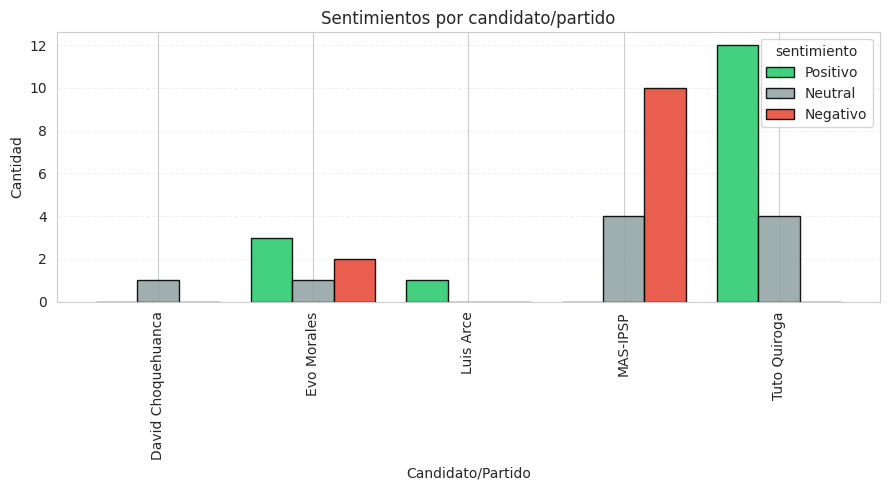

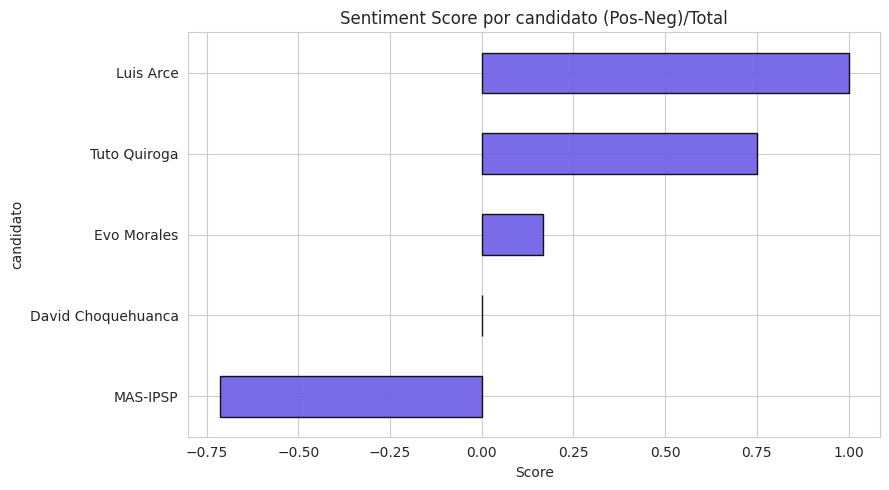


✅ Informe por candidato generado (solo visualización, sin archivos).


In [14]:
"""
ELECCIONES BOLIVIA 2026 — Sentimiento por CANDIDATO/PARTIDO (fuzzy)
- Lectura RAW desde GitHub
- Parser por líneas + normalización (leetspeak, acentos, elongaciones, risas, hashtags, negaciones, emojis)
- Diccionario ampliado (Bolivia) y compilación de regex segura
- Detección de CANDIDATOS/PARTIDOS por alias
- Informe por candidato + 2 gráficos compactos (sin guardar archivos)
"""

import re, unicodedata, requests, pandas as pd
import matplotlib.pyplot as plt

# =============== Normalización fuzzy ===============
LEET_MAP = str.maketrans({'4':'a','3':'e','1':'i','0':'o','5':'s','7':'t','@':'a','$':'s','!':'i','€':'e'})
URL_RE   = re.compile(r'https?://\S+|www\.\S+', re.I)
MENT_RE  = re.compile(r'(?<=\s)@\w+|^@\w+')
HASH_RE  = re.compile(r'#(\w+)')
LAUGH_RE = re.compile(r'\b(ja|je|ji|jo|ju|ha|he|hi|ho|hu){2,}\b', re.I)
ELONG_RE = re.compile(r'(.)\1{2,}', re.I)
SPACE_RE = re.compile(r'\s+')
POS_EMOJI = set(list("😀😃😄😁😆🙂😊😍🥰🤩😺👍👌👏💪✨✅🔥⭐️🎉🥳❤️💙💚💛💜🤝🙌"))
NEG_EMOJI = set(list("😞😟😠😡🤬😢😭💀☠️👎🤮🤢⚠️❌🚫😱😨😰🫤"))

def strip_accents(s):
    return ''.join(c for c in unicodedata.normalize('NFKD', s) if not unicodedata.combining(c))

def normalize_fuzzy(text):
    if not isinstance(text, str): text = str(text)
    emojis = ''.join(ch for ch in text if ch in POS_EMOJI or ch in NEG_EMOJI)
    text = URL_RE.sub(' ', text)
    text = MENT_RE.sub(' ', text)
    text = HASH_RE.sub(lambda m: f' {m.group(1)} ', text)
    text = text.translate(LEET_MAP)
    text = strip_accents(text.lower())
    text = LAUGH_RE.sub(' risas ', text)
    text = ELONG_RE.sub(r'\1\1', text)
    text = SPACE_RE.sub(' ', text).strip()
    return text, emojis

# =============== Diccionarios (Bolivia 2026) ===============
KEYWORDS_POS = [
    "oep","tse","tribunal supremo electoral","padron biometrico","trep","actas digitalizadas",
    "observadores","misiones electorales","veeduria","transparencia","voto informado",
    "voto responsable","debate serio","propuestas solidas","capacitacion de jurados",
    "estado de derecho","institucionalidad","democracia","respeto al voto","alternancia",
    "unidad nacional","reconciliacion","cohesion social","dialogo","acuerdo","consenso",
    "paz","pacifico","plan de gobierno","programa de gobierno","propuesta","gestion",
    "desarrollo","crecimiento","empleo","inversion","productivo","industrializacion",
    "litio","turismo","innovacion","tecnologia","energias limpias","seguridad alimentaria","agro",
    "inclusion","plurinacional","respeto a la wiphala","derechos","participacion",
    "ciudadania","juventud","jovenes","apoyo","respaldo","mejor","mejora","progreso",
    "avance","construir","trabajar","sumar","fortalecer"
]
KEYWORDS_NEG = [
    "corrupcion","corrupto","corruptos","coima","coimas","soborno","sobornos","clientelismo",
    "nepotismo","trafico de influencias","impunidad","fraude","manipulacion","quema de actas",
    "quema de tribunales","padron inflado","actas adulteradas","trep caido","boletas pre marcadas",
    "actas sin firmas","prorroguismo","ilegitimo","usurpacion","articulo 168","21f","violencia",
    "enfrentamientos","choques","represion","crisis","colapso","desastre","fracaso","incapacidad",
    "inseguridad","delincuencia","narcotrafico","cocaina","contrabando","extorsion","sicariato",
    "bloqueo","bloqueos","paro","paros","piquete","piquetes","desabastecimiento","odio",
    "discurso de odio","discriminacion","racismo","fraude 2019","2019 fue fraude","no hubo fraude",
    "mas","mas ipsp","creemos","comunidad ciudadana","cc","quiebre","fractura","boicot","trampa",
    "amenaza","no confio","no sirve","no merece","escandalo","falsas"
]
KEYWORDS_HARD_NEG = ["muerte","muertes","asesinato","asesinatos","terror","terrorismo","masacre","masacres","carcel","persecucion","tortura"]

NEGATORS = {'no','nunca','jamas','sin'}
WINDOW = 3

# =============== Compilación segura de patrones ===============
def compile_kw(phrases):
    pats = []
    for ph in phrases:
        ph = ph.strip()
        if not ph: continue
        esc = re.escape(ph).replace(r'\ ', r'\s+')
        pats.append(re.compile(r'(?<!\w)'+esc+r'(?!\w)', re.I))
    return pats

POS_RX = compile_kw(KEYWORDS_POS)
NEG_RX = compile_kw(KEYWORDS_NEG)
HARD_NEG_RX = compile_kw(KEYWORDS_HARD_NEG)

def count_emojis(emojis):
    pe = sum(1 for ch in emojis if ch in POS_EMOJI)
    ne = sum(1 for ch in emojis if ch in NEG_EMOJI)
    return pe, ne

def negated_tokens_before(norm_text, match_start):
    tokens_before = norm_text[:match_start].split()
    start = max(0, len(tokens_before)-WINDOW)
    return any(tok in NEGATORS for tok in tokens_before[start:])

def fuzzy_sentiment(text):
    norm, emojis = normalize_fuzzy(text)
    pos = neg = 0.0
    # POS
    for rx in POS_RX:
        for m in rx.finditer(norm):
            if negated_tokens_before(norm, m.start()): neg += 1.0
            else: pos += 1.0
    # NEG
    for rx in NEG_RX:
        for m in rx.finditer(norm):
            if negated_tokens_before(norm, m.start()): pos += 1.0
            else: neg += 1.0
    # HARD NEG
    for rx in HARD_NEG_RX:
        for m in rx.finditer(norm):
            if negated_tokens_before(norm, m.start()): pos += 1.5
            else: neg += 1.5
    # Emojis
    pe, ne = count_emojis(emojis)
    pos += 0.5*pe; neg += 0.5*ne
    if pos - neg > 0.7: return 'Positivo'
    if neg - pos > 0.7: return 'Negativo'
    return 'Neutral'

# =============== Candidatos/Partidos y alias ===============
CANDIDATE_ALIASES = {
    # MAS / entorno
    "Evo Morales": ["evo morales","evo","morales"],
    "Luis Arce": ["luis arce","arce","lucho arce"],
    "David Choquehuanca": ["david choquehuanca","choquehuanca"],
    "Andronico Rodriguez": ["andronico rodriguez","andronico"],
    "MAS-IPSP": ["mas","mas ipsp","instrumento politico"],
    # Oposición / otros
    "Carlos Mesa": ["carlos mesa","mesa","cc","comunidad ciudadana"],
    "Luis Fernando Camacho": ["luis fernando camacho","camacho","creemos"],
    "Tuto Quiroga": ["tuto quiroga","jorge quiroga","jorge 'tuto' quiroga","tuto"],
    "Chi Hyun Chung": ["chi hyun chung","chi chung","chi"],
    "Samuel Doria Medina": ["samuel doria medina","doria medina","samuel"],
    # Otros actores posibles
    "Manfred Reyes Villa": ["manfred reyes villa","manfred"],
    "Eva Copa": ["eva copa","copa"],
}

def compile_aliases(alias_dict):
    comp = {}
    for canon, aliases in alias_dict.items():
        pats = []
        for al in aliases:
            esc = re.escape(strip_accents(al.lower())).replace(r'\ ', r'\s+')
            pats.append(re.compile(r'(?<!\w)'+esc+r'(?!\w)', re.I))
        comp[canon] = pats
    return comp

ALIAS_RX = compile_aliases(CANDIDATE_ALIASES)

def find_candidates(text):
    norm, _ = normalize_fuzzy(text)
    found = set()
    for canon, patterns in ALIAS_RX.items():
        if any(rx.search(norm) for rx in patterns):
            found.add(canon)
    return sorted(found)

# =============== Descarga y parsing del TXT (Bolivia 2026) ===============
print("="*60, "\nINFORME POR CANDIDATO - BOLIVIA 2026")
url = "https://raw.githubusercontent.com/santiagonajera/Ejemplos-royectosDataScience/main/eleccionesBol2026.txt"
r = requests.get(url, timeout=30); r.raise_for_status()
txt = r.content.decode("utf-8-sig", errors="replace")

raw_lines = [ln.strip() for ln in txt.splitlines()]

def ruido(ln):
    if not ln: return True
    if ln in ("·","-","—","•"): return True
    if ln.lower().startswith("de "): return True
    if re.fullmatch(r'(\d{1,2}h)|(\d{1,2}\s*(ene|feb|mar|abr|may|jun|jul|ago|sept|set|oct|nov|dic)\.?)', ln.lower()):
        return True
    return False

lines = [ln for ln in raw_lines if not ruido(ln)]

df = pd.DataFrame({"text": lines})
df.insert(0, "id", range(1, len(df)+1))

# Sentimiento y candidatos
df["sentimiento"] = df["text"].apply(fuzzy_sentiment)
df["candidatos"] = df["text"].apply(find_candidates)

# Filtramos filas que mencionan al menos 1 candidato/partido
df_cand = df[df["candidatos"].map(len) > 0].copy()

# Explode para tener una fila por candidato
df_expl = df_cand.explode("candidatos").rename(columns={"candidatos":"candidato"})

# =============== Reporte por candidato ===============
print(f"\nRegistros totales: {len(df)} | Con candidatos: {len(df_expl)}")
if df_expl.empty:
    print("⚠️ No se detectaron menciones a candidatos con los alias definidos.")
else:
    resumen = (df_expl
               .groupby(["candidato","sentimiento"])
               .size()
               .unstack(fill_value=0)
               .reindex(columns=["Positivo","Neutral","Negativo"], fill_value=0))
    resumen["Total"] = resumen.sum(axis=1)
    for col in ["Positivo","Neutral","Negativo"]:
        resumen[col+"_pct"] = (resumen[col] / resumen["Total"] * 100).round(1)

    # Sentiment score: (Pos - Neg) / Total
    resumen["score"] = ((resumen["Positivo"] - resumen["Negativo"]) / resumen["Total"]).round(3)

    print("\n=== Resumen por candidato (conteos y %) ===")
    print(resumen.sort_values("Total", ascending=False).to_string())

    # Muestra de textos por candidato (hasta 2 cada uno)
    print("\n=== Muestra de textos por candidato ===")
    for cand in resumen.sort_values("Total", ascending=False).index.tolist():
        muestra = df_expl[df_expl["candidato"]==cand].head(2)
        for _, row in muestra.iterrows():
            print(f"[{cand}] ({row['sentimiento']}): {row['text']}")

    # =============== Gráficos compactos (2) ===============
    plt.rcParams["figure.figsize"] = (9, 5)
    plt.rcParams["figure.dpi"] = 100
    colors = {'Positivo':'#2ecc71','Neutral':'#95a5a6','Negativo':'#e74c3c'}

    # 1) Barras agrupadas por candidato
    plot_df = resumen[["Positivo","Neutral","Negativo"]].copy()
    ax = plot_df.plot(kind="bar", width=0.8, edgecolor='black', linewidth=1.0, alpha=0.9,
                      color=[colors[c] for c in ["Positivo","Neutral","Negativo"]])
    ax.set_title("Sentimientos por candidato/partido")
    ax.set_xlabel("Candidato/Partido")
    ax.set_ylabel("Cantidad")
    ax.grid(axis='y', alpha=0.25, linestyle='--')
    plt.tight_layout(); plt.show()

    # 2) Barra horizontal de “sentiment score”
    plt.figure()
    sc = resumen["score"].sort_values()
    sc.plot(kind="barh", edgecolor='black', linewidth=1.0, alpha=0.9, color="#6c5ce7")
    plt.title("Sentiment Score por candidato (Pos-Neg)/Total")
    plt.xlabel("Score")
    plt.tight_layout(); plt.show()

print("\n✅ Informe por candidato generado (solo visualización, sin archivos).")


INFORME POR CANDIDATO - BOLIVIA 2026

Resumen por candidato:
 sentimiento         Positivo  Neutral  Negativo  Total  score
candidato                                                    
Rodrigo Paz               32        1         1     34  0.912
Tuto Quiroga              14        2         0     16  0.875
MAS-IPSP                   4        8         2     14  0.143
Evo Morales                3        3         0      6  0.500
David Choquehuanca         0        1         0      1  0.000
Luis Arce                  1        0         0      1  1.000


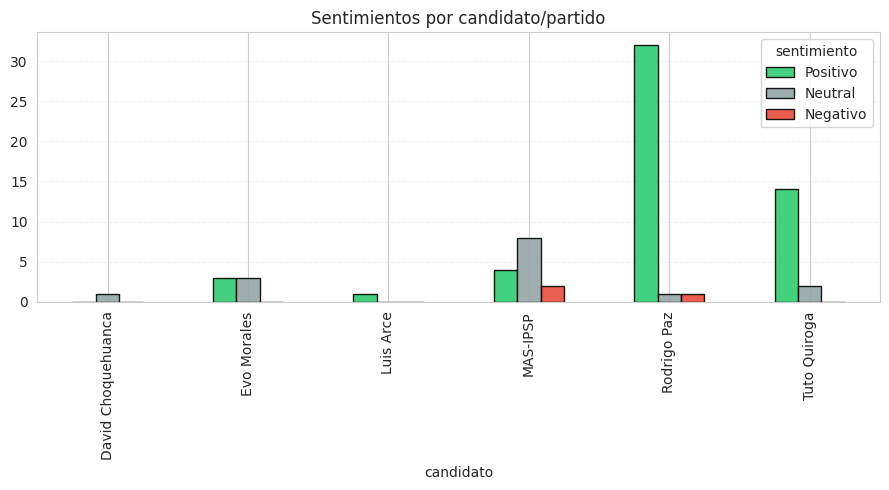

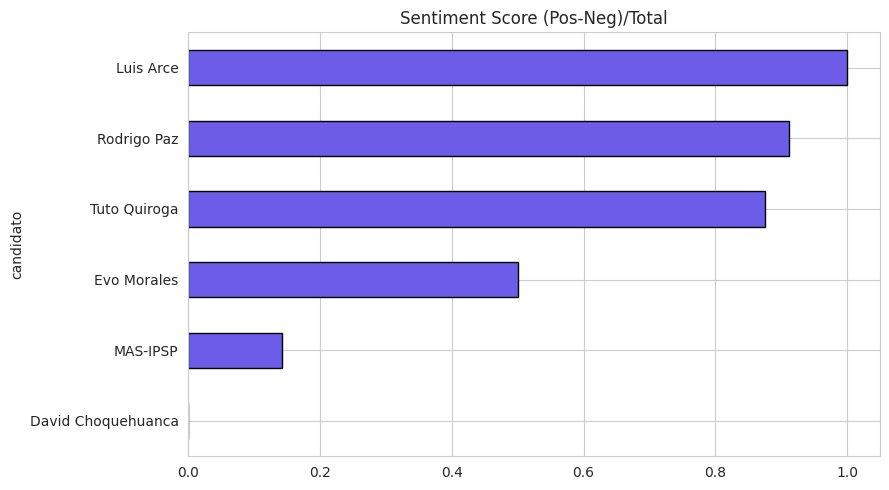

In [15]:
"""
ELECCIONES BOLIVIA 2026 — Sentimiento por CANDIDATO/PARTIDO (incluye Rodrigo Paz)
"""

import re, unicodedata, requests, pandas as pd
import matplotlib.pyplot as plt

# ---------- Normalización ----------
LEET_MAP = str.maketrans({'4':'a','3':'e','1':'i','0':'o','5':'s','7':'t','@':'a','$':'s','!':'i','€':'e'})
URL_RE = re.compile(r'https?://\S+|www\.\S+', re.I)
MENT_RE = re.compile(r'(?<=\s)@\w+|^@\w+')
HASH_RE = re.compile(r'#(\w+)')
LAUGH_RE = re.compile(r'\b(ja|je|ji|jo|ju|ha|he|hi|ho|hu){2,}\b', re.I)
ELONG_RE = re.compile(r'(.)\1{2,}', re.I)
SPACE_RE = re.compile(r'\s+')
POS_EMOJI = set(list("😀😃😄😁😆🙂😊😍🥰🤩😺👍👌👏💪✨✅🔥⭐️🎉🥳❤️💙💚💛💜🤝🙌"))
NEG_EMOJI = set(list("😞😟😠😡🤬😢😭💀☠️👎🤮🤢⚠️❌🚫😱😨😰🫤"))

def strip_accents(s):
    return ''.join(c for c in unicodedata.normalize('NFKD', s)
                   if not unicodedata.combining(c))

def normalize_fuzzy(text):
    if not isinstance(text, str): text = str(text)
    emojis = ''.join(ch for ch in text if ch in POS_EMOJI or ch in NEG_EMOJI)
    text = URL_RE.sub(' ', text)
    text = MENT_RE.sub(' ', text)
    text = HASH_RE.sub(lambda m: f' {m.group(1)} ', text)
    text = text.translate(LEET_MAP)
    text = strip_accents(text.lower())
    text = LAUGH_RE.sub(' risas ', text)
    text = ELONG_RE.sub(r'\1\1', text)
    text = SPACE_RE.sub(' ', text).strip()
    return text, emojis

# ---------- Diccionarios ----------
KEYWORDS_POS = ["democracia","transparencia","unidad","dialogo","paz","plan de gobierno",
                "desarrollo","crecimiento","empleo","inversion","litio","innovacion",
                "participacion","juventud","trabajar","fortalecer","progreso","avance"]
KEYWORDS_NEG = ["corrupcion","fraude","violencia","crisis","represion","inseguridad",
                "narcotrafico","bloqueo","odio","racismo","autoritarismo"]
KEYWORDS_HARD_NEG = ["muerte","asesinato","masacre","terrorismo","tortura"]
NEGATORS = {'no','nunca','jamas','sin'}
WINDOW = 3

def compile_kw(words):
    pats=[]
    for w in words:
        esc=re.escape(w).replace(r'\ ',r'\s+')
        pats.append(re.compile(r'(?<!\w)'+esc+r'(?!\w)',re.I))
    return pats

POS_RX=compile_kw(KEYWORDS_POS)
NEG_RX=compile_kw(KEYWORDS_NEG)
HARD_NEG_RX=compile_kw(KEYWORDS_HARD_NEG)

def negated_tokens_before(norm,start):
    toks=norm[:start].split()
    return any(t in NEGATORS for t in toks[-WINDOW:])

def fuzzy_sentiment(text):
    norm,emojis=normalize_fuzzy(text)
    pos=neg=0.0
    for rx in POS_RX:
        for m in rx.finditer(norm):
            neg+=1.0 if negated_tokens_before(norm,m.start()) else 0
            pos+=0 if negated_tokens_before(norm,m.start()) else 1.0
    for rx in NEG_RX:
        for m in rx.finditer(norm):
            pos+=1.0 if negated_tokens_before(norm,m.start()) else 0
            neg+=0 if negated_tokens_before(norm,m.start()) else 1.0
    for rx in HARD_NEG_RX:
        for m in rx.finditer(norm):
            pos+=1.5 if negated_tokens_before(norm,m.start()) else 0
            neg+=0 if negated_tokens_before(norm,m.start()) else 1.5
    pe=sum(1 for c in emojis if c in POS_EMOJI)
    ne=sum(1 for c in emojis if c in NEG_EMOJI)
    pos+=0.5*pe; neg+=0.5*ne
    if pos-neg>0.7: return 'Positivo'
    if neg-pos>0.7: return 'Negativo'
    return 'Neutral'

# ---------- Candidatos y alias ----------
CANDIDATE_ALIASES={
 "Evo Morales":["evo morales","evo","morales"],
 "Luis Arce":["luis arce","arce","lucho arce"],
 "David Choquehuanca":["david choquehuanca","choquehuanca"],
 "Andronico Rodriguez":["andronico rodriguez","andronico"],
 "MAS-IPSP":["mas","mas ipsp","instrumento politico"],
 "Carlos Mesa":["carlos mesa","mesa","cc","comunidad ciudadana"],
 "Luis Fernando Camacho":["luis fernando camacho","camacho","creemos"],
 "Tuto Quiroga":["tuto quiroga","jorge quiroga","tuto"],
 "Chi Hyun Chung":["chi hyun chung","chi chung","chi"],
 "Samuel Doria Medina":["samuel doria medina","doria medina","samuel"],
 "Manfred Reyes Villa":["manfred reyes villa","manfred"],
 "Eva Copa":["eva copa","copa"],
 "Rodrigo Paz":["rodrigo paz","rodrigo","paz"],   # 🔹 nuevo candidato
}

def compile_aliases(alias_dict):
    comp={}
    for canon,als in alias_dict.items():
        pats=[]
        for al in als:
            esc=re.escape(strip_accents(al.lower())).replace(r'\ ',r'\s+')
            pats.append(re.compile(r'(?<!\w)'+esc+r'(?!\w)',re.I))
        comp[canon]=pats
    return comp

ALIAS_RX=compile_aliases(CANDIDATE_ALIASES)

def find_candidates(text):
    norm,_=normalize_fuzzy(text)
    found=set()
    for name,rxs in ALIAS_RX.items():
        if any(rx.search(norm) for rx in rxs):
            found.add(name)
    return sorted(found)

# ---------- Descargar y analizar ----------
print("="*60,"\nINFORME POR CANDIDATO - BOLIVIA 2026")
url="https://raw.githubusercontent.com/santiagonajera/Ejemplos-royectosDataScience/main/eleccionesBol2026.txt"
txt=requests.get(url,timeout=30).content.decode("utf-8-sig",errors="replace")
lines=[ln.strip() for ln in txt.splitlines() if ln.strip() and not ln.lower().startswith("de ")]
df=pd.DataFrame({"id":range(1,len(lines)+1),"text":lines})
df["sentimiento"]=df["text"].apply(fuzzy_sentiment)
df["candidatos"]=df["text"].apply(find_candidates)
df_cand=df[df["candidatos"].map(len)>0].explode("candidatos").rename(columns={"candidatos":"candidato"})

# ---------- Resumen ----------
if df_cand.empty:
    print("⚠️ No se detectaron candidatos.")
else:
    resumen=(df_cand.groupby(["candidato","sentimiento"])
             .size().unstack(fill_value=0)
             .reindex(columns=["Positivo","Neutral","Negativo"],fill_value=0))
    resumen["Total"]=resumen.sum(1)
    resumen["score"]=((resumen["Positivo"]-resumen["Negativo"])/resumen["Total"]).round(3)
    print("\nResumen por candidato:\n",resumen.sort_values("Total",ascending=False).to_string())

    # ---------- Gráficos ----------
    plt.rcParams["figure.figsize"]=(9,5); plt.rcParams["figure.dpi"]=100
    colors={'Positivo':'#2ecc71','Neutral':'#95a5a6','Negativo':'#e74c3c'}
    resumen[["Positivo","Neutral","Negativo"]].plot(kind="bar",color=[colors[c] for c in colors],
        edgecolor='black',linewidth=1,alpha=0.9)
    plt.title("Sentimientos por candidato/partido"); plt.grid(axis='y',alpha=0.25,linestyle='--')
    plt.tight_layout(); plt.show()
    resumen["score"].sort_values().plot(kind="barh",color="#6c5ce7",edgecolor='black')
    plt.title("Sentiment Score (Pos-Neg)/Total"); plt.tight_layout(); plt.show()
